In [66]:
import time
import Magnitudes
import matplotlib.pyplot as plt
import numpy as np
from __future__ import print_function
from astropy.coordinates import SkyCoord
import astropy.units as units
from dustmaps.bayestar import BayestarQuery
from matplotlib.mlab import griddata
from scipy.stats import norm
import sfdmap
from scipy import stats
from matplotlib.font_manager import FontProperties
# try:
#     import valuefile
# except SyntaxError:
#     pass
#import newvaluefile as valuefile
import valuefile1000 as valuefile

In [116]:
fullMag = valuefile.fullMagastro1304
fullPeriod = valuefile.fullPeriodastro1304

In [117]:
def clean(inlist):
    newfullMag = []
    for x in range(len(inlist)/2):
        tempmag = []
        othertemp = []
        for y in range(10):
        #print(fullMag[x*2])
            #print(inlist[x][y])
            #print(x,y)
            tempmag.append(inlist[x*2][y])
        for y in range(10):
        #print(fullMag[x*2])
            #print(inlist[x][y])
            #print(x,y)
            tempmag.append(inlist[(x*2)+1][y])    
        #othertemp.extend(tempmag)
        newfullMag.append(tempmag)
        #print(tempmag)
        #newfullMag.append(tempmag)
    fullMag = newfullMag
    #print(fullMag)
    return fullMag

In [118]:
fullMag = clean(fullMag)
fullPeriod = clean(fullPeriod)
# for x in range(len(fullPeriod)):
#     fullPeriod[x] = [2*p for p in fullPeriod[x]]

In [119]:
name = ['astro','minion','panstars','baseline'] #'minionOC',
number = ['3311','1322','1304','630','1929'] # '169']
attribute = ['fullSig','fullmeasuredPeriod','fullMag']

string0 = 'sigLevels = [' 
string1 = 'measuredPeriods = [' 
string2 = 'fullRed = [' 

for x,na in enumerate(name):
    for y,nu in enumerate(number):
        string0 += ('valuefile.'+attribute[0]+na+nu+',')
        string1 += ('valuefile.'+attribute[1]+na+nu+',')
        string2 += ('valuefile.'+attribute[2]+na+nu+',')

string0 = string0[:-1]+']'
string1 = string1[:-1]+']'
string2 = string2[:-1]+']'


In [120]:
strat = []
for x,na in enumerate((name)):
    for y,nu in enumerate((number)):
        strat.extend(na+nu)

In [121]:
sigLevels = [valuefile.fullSigastro3311,valuefile.fullSigastro1322,valuefile.fullSigastro1304,valuefile.fullSigastro630,valuefile.fullSigastro1929,valuefile.fullSigminion3311,valuefile.fullSigminion1322,valuefile.fullSigminion1304,valuefile.fullSigminion630,valuefile.fullSigminion1929,valuefile.fullSigpanstars3311,valuefile.fullSigpanstars1322,valuefile.fullSigpanstars1304,valuefile.fullSigpanstars630,valuefile.fullSigpanstars1929,valuefile.fullSigbaseline3311,valuefile.fullSigbaseline1322,valuefile.fullSigbaseline1304,valuefile.fullSigbaseline630,valuefile.fullSigbaseline1929]

In [122]:
measuredPeriods = [valuefile.fullmeasuredPeriodastro3311,valuefile.fullmeasuredPeriodastro1322,valuefile.fullmeasuredPeriodastro1304,valuefile.fullmeasuredPeriodastro630,valuefile.fullmeasuredPeriodastro1929,valuefile.fullmeasuredPeriodminion3311,valuefile.fullmeasuredPeriodminion1322,valuefile.fullmeasuredPeriodminion1304,valuefile.fullmeasuredPeriodminion630,valuefile.fullmeasuredPeriodminion1929,valuefile.fullmeasuredPeriodpanstars3311,valuefile.fullmeasuredPeriodpanstars1322,valuefile.fullmeasuredPeriodpanstars1304,valuefile.fullmeasuredPeriodpanstars630,valuefile.fullmeasuredPeriodpanstars1929,valuefile.fullmeasuredPeriodbaseline3311,valuefile.fullmeasuredPeriodbaseline1322,valuefile.fullmeasuredPeriodbaseline1304,valuefile.fullmeasuredPeriodbaseline630,valuefile.fullmeasuredPeriodbaseline1929]

In [123]:
fullRed = [valuefile.fullMagastro3311,valuefile.fullMagastro1322,valuefile.fullMagastro1304,valuefile.fullMagastro630,valuefile.fullMagastro1929,valuefile.fullMagminion3311,valuefile.fullMagminion1322,valuefile.fullMagminion1304,valuefile.fullMagminion630,valuefile.fullMagminion1929,valuefile.fullMagpanstars3311,valuefile.fullMagpanstars1322,valuefile.fullMagpanstars1304,valuefile.fullMagpanstars630,valuefile.fullMagpanstars1929,valuefile.fullMagbaseline3311,valuefile.fullMagbaseline1322,valuefile.fullMagbaseline1304,valuefile.fullMagbaseline630,valuefile.fullMagbaseline1929]

In [124]:
# sigLevels = clean(sigLevels)
# measuredPeriods = clean(measuredPeriods)
# fullRed = clean(fullRed)


In [125]:
def multiList(inlist):
    finallist = []
    for x in range(len(inlist)):
        onelist = clean(inlist[x])
        #print(len(onelist[0]))
        finallist.append(onelist)
    return finallist

In [126]:
sigLevels = multiList(sigLevels)
measuredPeriods = multiList(measuredPeriods)
fullRed = multiList(fullRed)



In [127]:
counter = 0
goodcounter = 0

astrotot, miniontot, panstarstot,baselinetot = 0.,0.,0.,0.

for z in range(len(measuredPeriods)):
    counter = 0
    goodcounter = 0
    tot = 0
    for x in range(len(fullMag)):
        for y in range(len(fullPeriod)):
            #print(x,y)
            tot += 1
            if measuredPeriods[z][x][y] < (fullPeriod[x][y]+(fullPeriod[x][y]*0.05)) and measuredPeriods[z][x][y] > (fullPeriod[x][y]-(fullPeriod[x][y]*0.05)):
                goodcounter += 1.
            else:
                sigLevels[z][x][y] = 0
                counter +=1.
    print(goodcounter/tot)
    fraction = goodcounter/(counter+goodcounter)
    print(fraction)
    print((name[z/5],number[z-(int(z/5)*5)]))
    print()
    if name[z/5] == 'astro':
        astrotot += fraction
    if name[z/5] == 'minion':
        miniontot += fraction
    if name[z/5] == 'panstars':
        panstarstot += fraction
    if name[z/5] == 'baseline':
        baselinetot += fraction

        
print(astrotot/4,'astro')
print(miniontot/4,'minion')
print(baselinetot/4,'basline')
print(panstarstot/4,'panstars')


0.3825
0.3825
('astro', '3311')

0.2975
0.2975
('astro', '1322')

0.9475
0.9475
('astro', '1304')

0.91
0.91
('astro', '630')

0.8425
0.8425
('astro', '1929')

0.345
0.345
('minion', '3311')

0.085
0.085
('minion', '1322')

0.6175
0.6175
('minion', '1304')

0.705
0.705
('minion', '630')

0.85
0.85
('minion', '1929')

0.6575
0.6575
('panstars', '3311')

0.29
0.29
('panstars', '1322')

0.9425
0.9425
('panstars', '1304')

0.885
0.885
('panstars', '630')

0.8275
0.8275
('panstars', '1929')

0.1675
0.1675
('baseline', '3311')

0.0075
0.0075
('baseline', '1322')

0.405
0.405
('baseline', '1304')

0.3525
0.3525
('baseline', '630')

0.785
0.785
('baseline', '1929')

0.845 astro
0.650625 minion
0.429375 basline
0.900625 panstars


In [128]:
nFullPeriod = []

for x in range(len(fullPeriod)):
    newFullPeiord = [2*x for x in fullPeriod[x]]
    nFullPeriod.append(newFullPeiord)
fullPeriod = nFullPeriod

In [94]:
name = ['astro','minion','panstars','baseline'] #'minionOC',
number = ['1322','1304','3311','630','1929'] # '169']
attribute = ['fullSigLevel','fullmeasuredPeriod']
string1 = 'sigLevels = [' 
string2 = 'measuredPeriods = [' 

for x,na in enumerate(name):
    string1 += '['
    string2 += '['
    for y,nu in enumerate(number):
        string1 += ('valuefile.'+attribute[0]+na+nu+',')
        string2 += ('valuefile.'+attribute[1]+na+nu+',')
    string1 = string1[:-1]+'],'
    string2 = string2[:-1]+'],'
string1 = string1[:-2]+']]'
string2 = string2[:-2]+']]'

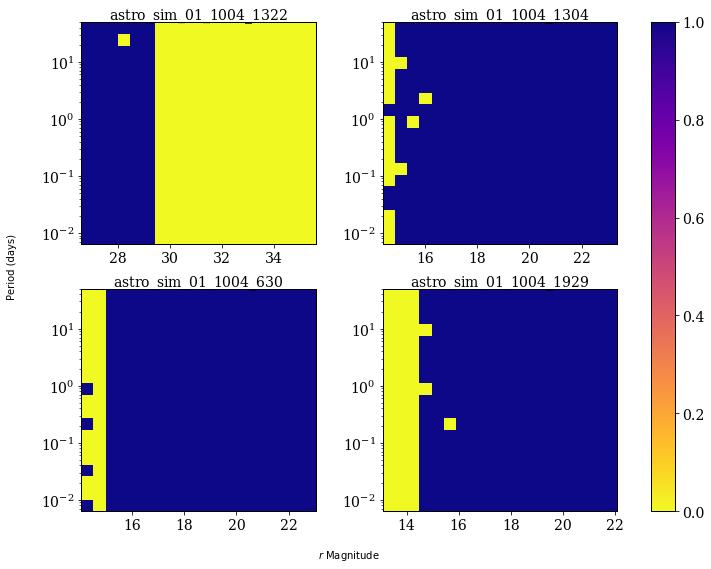

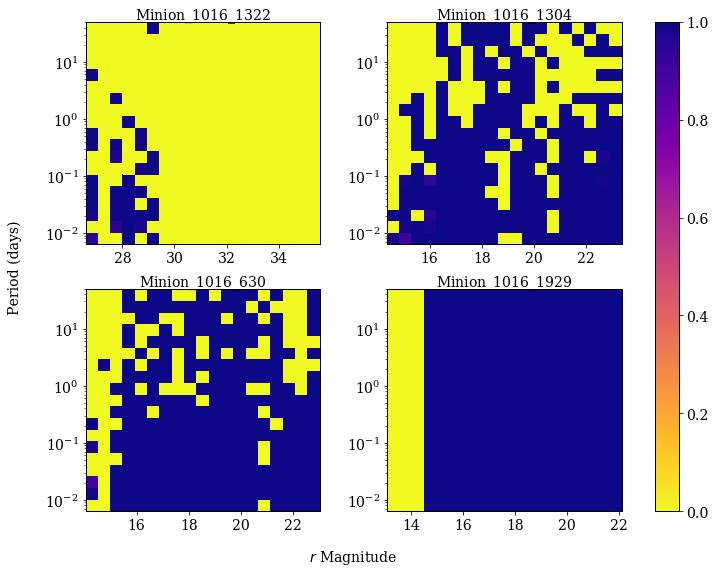

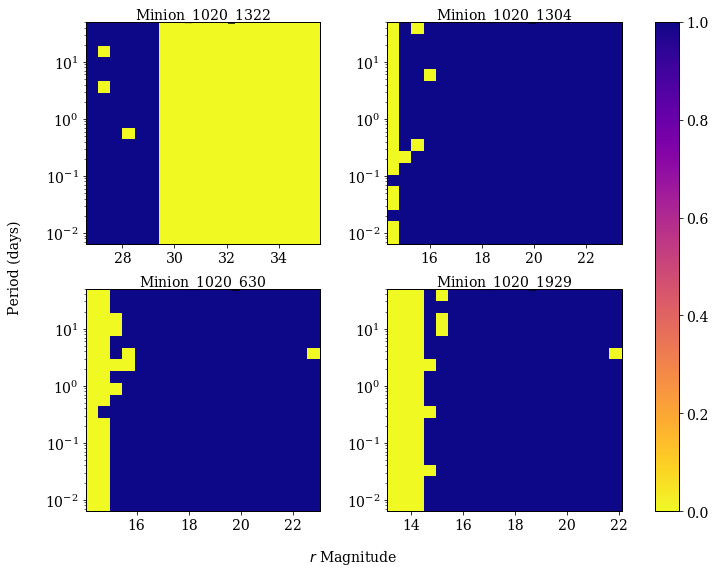

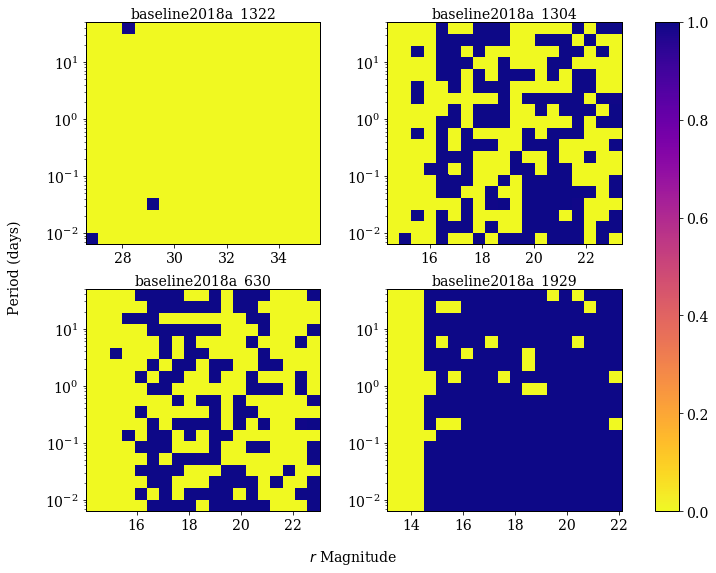

In [30]:
import matplotlib.gridspec as gridspec

#name = ['minion','minionOC','astro','panstars']
name = ['astro$\_$sim$\_$01$\_$1004','Minion$\_$1016','Minion$\_$1020','baseline2018a'] #'minionOC',
number = ['3311','1322','1304','630','1929'] # '169']

for x in range(len(name)):
    fig = plt.figure(figsize=(12,9))
    font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}


    gs=gridspec.GridSpec(2,2000)

    plt.rc('axes',linewidth=0)
    ydis = 1.07
    fakeaxis=fig.add_subplot(gs[:,:])
    fakeaxis.set_yticks([])
    fakeaxis.set_xticks([])

    ax_list = fig.axes

    plt.rc('font', **font)
    plt.rc('axes',linewidth=1)
    
    
#     print(len(fullRed[(x*len(number))+1]))
#     print(len(fullRed[(x*len(number))+1][0]))
#     print(fullRed[(x*len(number))+1])
    
    p1=fig.add_subplot(gs[0,0:700])    
    im = p1.pcolor(fullRed[(x*len(number))+1],fullPeriod,sigLevels[(x*len(number))+1],cmap='plasma_r',vmin=0,vmax=1)
    p1.set_yscale('log')
    p1.set_ylabel(name[x]+'_'+number[1],rotation=0,va="top")
    p1.yaxis.set_label_coords(0.5,ydis)

    p2=fig.add_subplot(gs[0,900:1600])
    im = p2.pcolor(fullRed[(x*len(number))+2],fullPeriod,sigLevels[(x*len(number))+2],cmap='plasma_r',vmin=0,vmax=1)
    p2.set_yscale('log')
    p2.set_ylabel(name[x]+'_'+number[2],rotation=0,va="top")
    p2.yaxis.set_label_coords(0.5,ydis)

    p3=fig.add_subplot(gs[1,0:700])
    im = p3.pcolor(fullRed[(x*len(number))+3],fullPeriod,sigLevels[(x*len(number))+3],cmap='plasma_r',vmin=0,vmax=1)
    p3.set_yscale('log')
    p3.set_ylabel(name[x]+'_'+number[3],rotation=0,va="top")
    p3.yaxis.set_label_coords(0.5,ydis)

    p4=fig.add_subplot(gs[1,900:1600])
    im = p4.pcolor(fullRed[(x*len(number))+4],fullPeriod,sigLevels[(x*len(number))+4],cmap='plasma_r',vmin=0,vmax=1)
    p4.set_yscale('log')
    p4.set_ylabel(name[x]+'_'+number[4],rotation=0,va="top")
    p4.yaxis.set_label_coords(0.5,ydis)

    print(ax_list)

    #fig.colorbar(im, ax=ax.ravel().tolist())
    plt.sca(fakeaxis)
    plt.colorbar(im)
    fakeaxis.set_xlabel('$\it{r}$ Magnitude')
    fakeaxis.set_ylabel('Period (days)',labelpad=20)
    fakeaxis.yaxis.set_label_coords(-0.12, 0.5)
    #fakeaxis.set_label_coords(0.5,-0.1)
    #label = fakeaxis.set_xlabel('Xlabel', fontsize = 9)
    fakeaxis.xaxis.set_label_coords(0.5, -0.075)
    plt.savefig(name[x]+'New.png')
    plt.show()

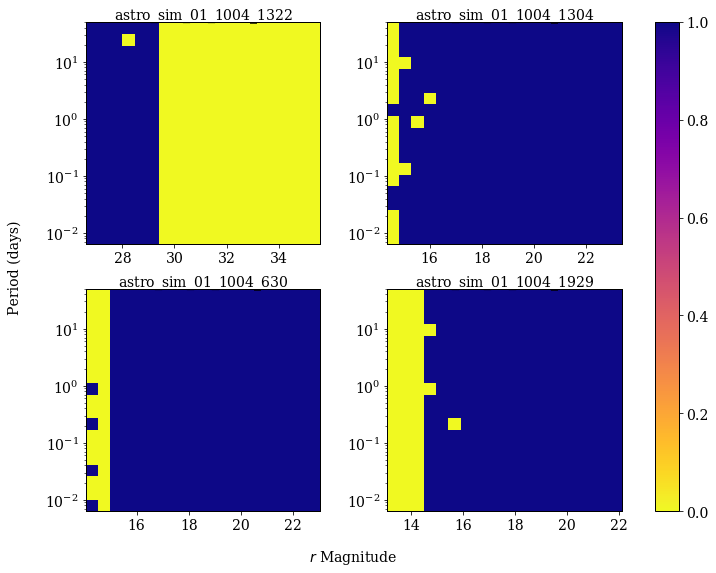

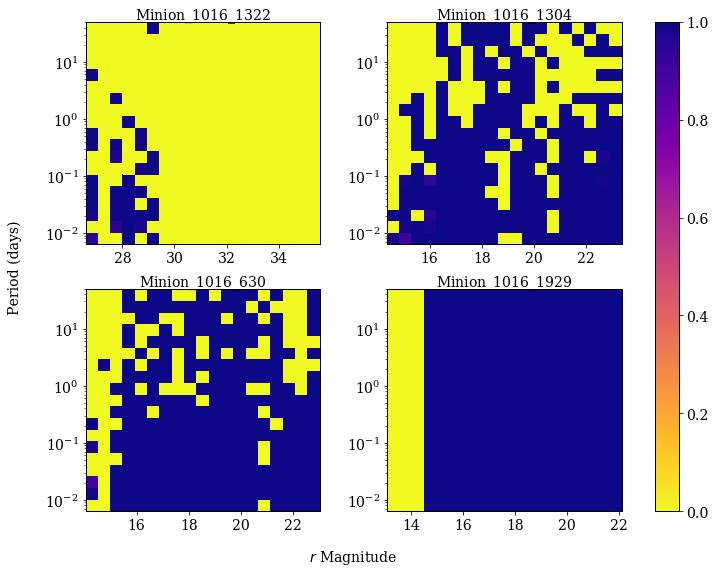

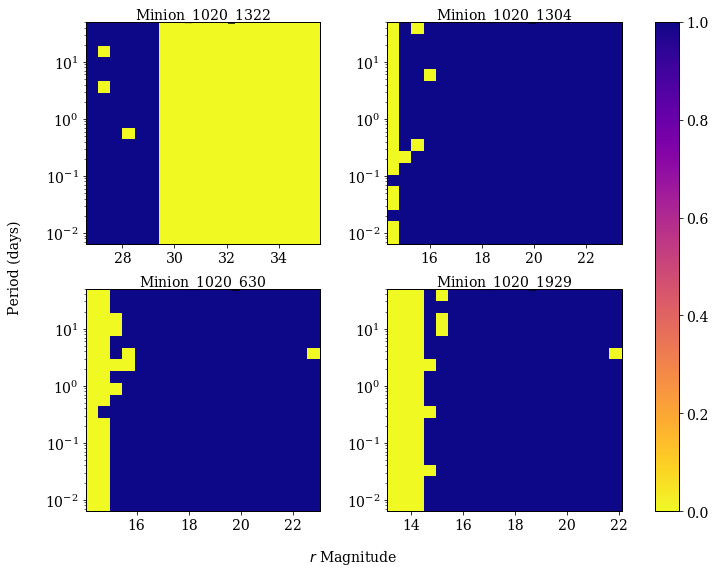

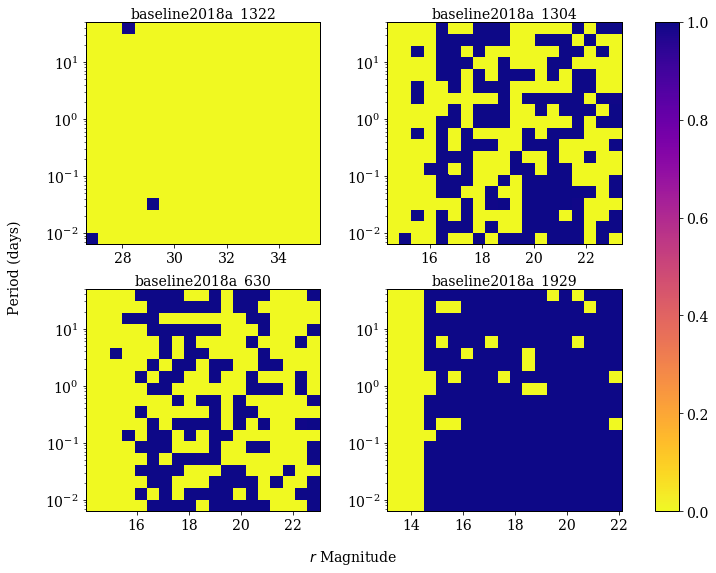

In [31]:
import matplotlib.gridspec as gridspec

#name = ['minion','minionOC','astro','panstars']
name = ['astro$\_$sim$\_$01$\_$1004','Minion$\_$1016','Minion$\_$1020','baseline2018a'] #'minionOC',
number = ['3311','1322','1304','630','1929'] # '169']

for x in range(len(name)):
    fig = plt.figure(figsize=(12,9))
    font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}


    gs=gridspec.GridSpec(2,2000)

    plt.rc('axes',linewidth=0)
    ydis = 1.07
    fakeaxis=fig.add_subplot(gs[:,:])
    fakeaxis.set_yticks([])
    fakeaxis.set_xticks([])

    ax_list = fig.axes

    plt.rc('font', **font)
    plt.rc('axes',linewidth=1)
    
    
#     print(len(fullRed[(x*len(number))+1]))
#     print(len(fullRed[(x*len(number))+1][0]))
#     print(fullRed[(x*len(number))+1])
    
    p1=fig.add_subplot(gs[0,0:700])    
    im = p1.pcolor(fullRed[(x*len(number))+1],fullPeriod,sigLevels[(x*len(number))+1],cmap='plasma_r',vmin=0,vmax=1)
    p1.set_yscale('log')
    p1.set_ylabel(name[x]+'_'+number[1],rotation=0,va="top")
    p1.yaxis.set_label_coords(0.5,ydis)

    p2=fig.add_subplot(gs[0,900:1600])
    im = p2.pcolor(fullRed[(x*len(number))+2],fullPeriod,sigLevels[(x*len(number))+2],cmap='plasma_r',vmin=0,vmax=1)
    p2.set_yscale('log')
    p2.set_ylabel(name[x]+'_'+number[2],rotation=0,va="top")
    p2.yaxis.set_label_coords(0.5,ydis)

    p3=fig.add_subplot(gs[1,0:700])
    im = p3.pcolor(fullRed[(x*len(number))+3],fullPeriod,sigLevels[(x*len(number))+3],cmap='plasma_r',vmin=0,vmax=1)
    p3.set_yscale('log')
    p3.set_ylabel(name[x]+'_'+number[3],rotation=0,va="top")
    p3.yaxis.set_label_coords(0.5,ydis)

    p4=fig.add_subplot(gs[1,900:1600])
    im = p4.pcolor(fullRed[(x*len(number))+4],fullPeriod,sigLevels[(x*len(number))+4],cmap='plasma_r',vmin=0,vmax=1)
    p4.set_yscale('log')
    p4.set_ylabel(name[x]+'_'+number[4],rotation=0,va="top")
    p4.yaxis.set_label_coords(0.5,ydis)

    print(ax_list)

    #fig.colorbar(im, ax=ax.ravel().tolist())
    plt.sca(fakeaxis)
    plt.colorbar(im)
    fakeaxis.set_xlabel('$\it{r}$ Magnitude')
    fakeaxis.set_ylabel('Period (days)',labelpad=20)
    fakeaxis.yaxis.set_label_coords(-0.12, 0.5)
    #fakeaxis.set_label_coords(0.5,-0.1)
    #label = fakeaxis.set_xlabel('Xlabel', fontsize = 9)
    fakeaxis.xaxis.set_label_coords(0.5, -0.075)
    plt.savefig(name[x]+'New.png')
    plt.show()

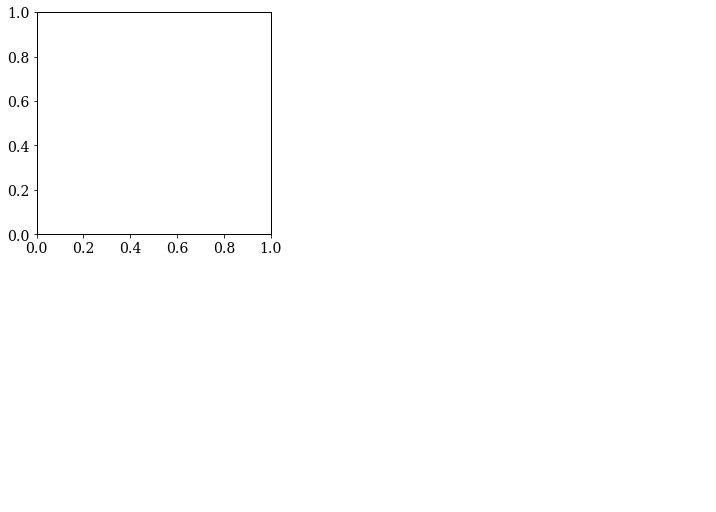

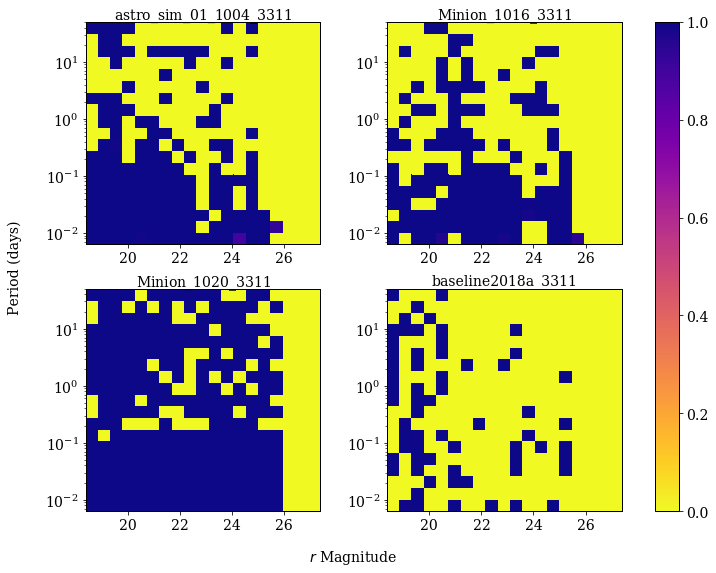

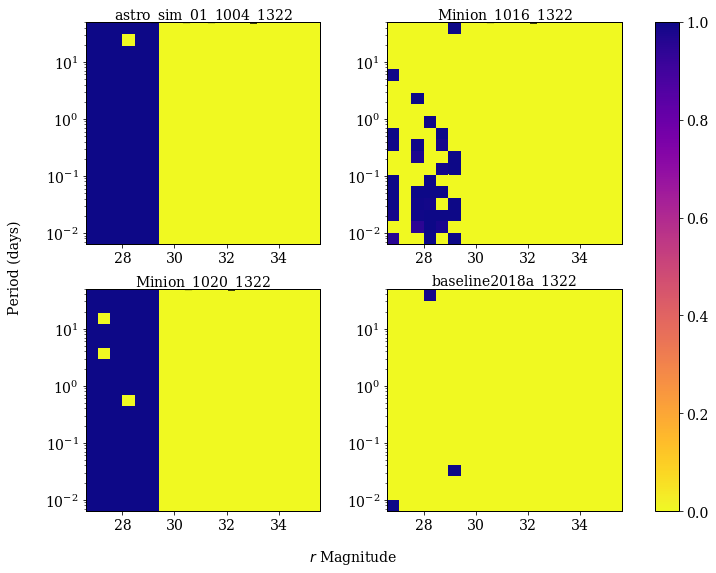

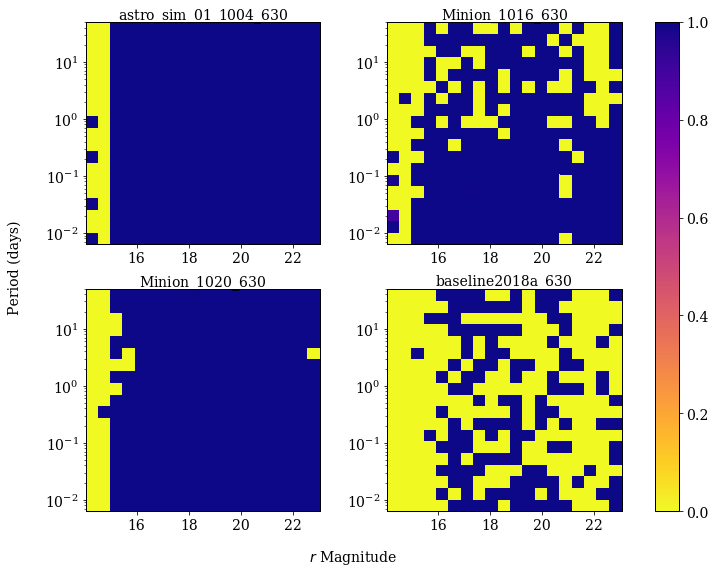

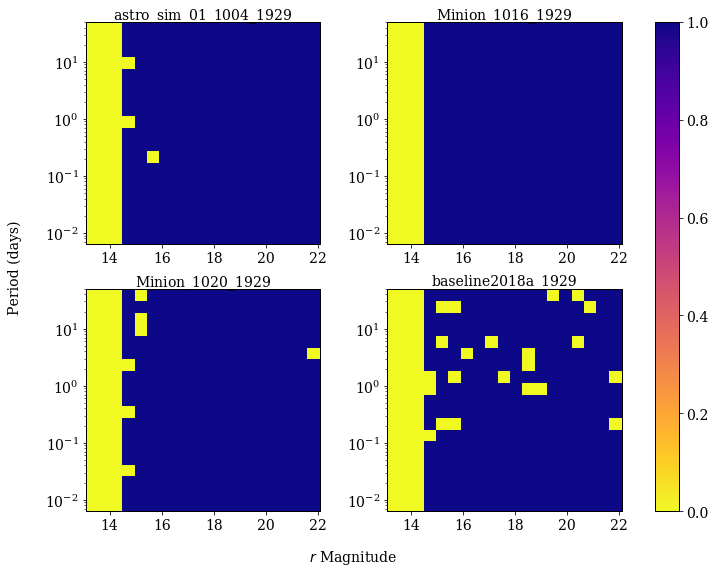

In [80]:
import matplotlib.gridspec as gridspec

#name = ['minion','minionOC','astro','panstars']
name = ['astro$\_$sim$\_$01$\_$1004','Minion$\_$1016','Minion$\_$1020','baseline2018a'] #'minionOC',
number = ['3311','1322','1304','630','1929'] # '169']

for x in range(len(number)):
    fig = plt.figure(figsize=(12,9))
    font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}


    gs=gridspec.GridSpec(2,2000)

    plt.rc('axes',linewidth=0)
    ydis = 1.07
    fakeaxis=fig.add_subplot(gs[:,:])
    fakeaxis.set_yticks([])
    fakeaxis.set_xticks([])

    ax_list = fig.axes

    plt.rc('font', **font)
    plt.rc('axes',linewidth=1)
    
    
#     print(len(fullRed[(x*len(number))+1]))
#     print(len(fullRed[(x*len(number))+1][0]))
#     print(fullRed[(x*len(number))+1])
    
    p1=fig.add_subplot(gs[0,0:700])    
    im = p1.pcolor(fullRed[0+x],fullPeriod,sigLevels[0+x],cmap='plasma_r',vmin=0,vmax=1)
    p1.set_yscale('log')
    p1.set_ylabel(name[0]+'_'+number[x],rotation=0,va="top")
    p1.yaxis.set_label_coords(0.5,ydis)

    p2=fig.add_subplot(gs[0,900:1600])
    im = p2.pcolor(fullRed[5+x],fullPeriod,sigLevels[5+x],cmap='plasma_r',vmin=0,vmax=1)
    p2.set_yscale('log')
    p2.set_ylabel(name[1]+'_'+number[x],rotation=0,va="top")
    p2.yaxis.set_label_coords(0.5,ydis)

    p3=fig.add_subplot(gs[1,0:700])
    im = p3.pcolor(fullRed[10+x],fullPeriod,sigLevels[10+x],cmap='plasma_r',vmin=0,vmax=1)
    p3.set_yscale('log')
    p3.set_ylabel(name[2]+'_'+number[x],rotation=0,va="top")
    p3.yaxis.set_label_coords(0.5,ydis)

    p4=fig.add_subplot(gs[1,900:1600])
    im = p4.pcolor(fullRed[15+x],fullPeriod,sigLevels[15+x],cmap='plasma_r',vmin=0,vmax=1)
    p4.set_yscale('log')
    p4.set_ylabel(name[3]+'_'+number[x],rotation=0,va="top")
    p4.yaxis.set_label_coords(0.5,ydis)

    print(ax_list)

    #fig.colorbar(im, ax=ax.ravel().tolist())
    plt.sca(fakeaxis)
    plt.colorbar(im)
    fakeaxis.set_xlabel('$\it{r}$ Magnitude')
    fakeaxis.set_ylabel('Period (days)',labelpad=20)
    fakeaxis.yaxis.set_label_coords(-0.12, 0.5)
    #fakeaxis.set_label_coords(0.5,-0.1)
    #label = fakeaxis.set_xlabel('Xlabel', fontsize = 9)
    fakeaxis.xaxis.set_label_coords(0.5, -0.075)
    plt.savefig(number[x]+'New.png')
    plt.show()

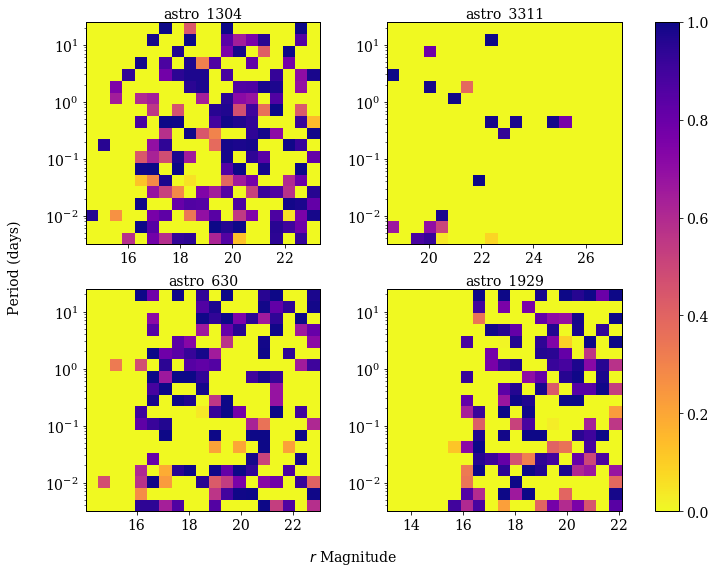

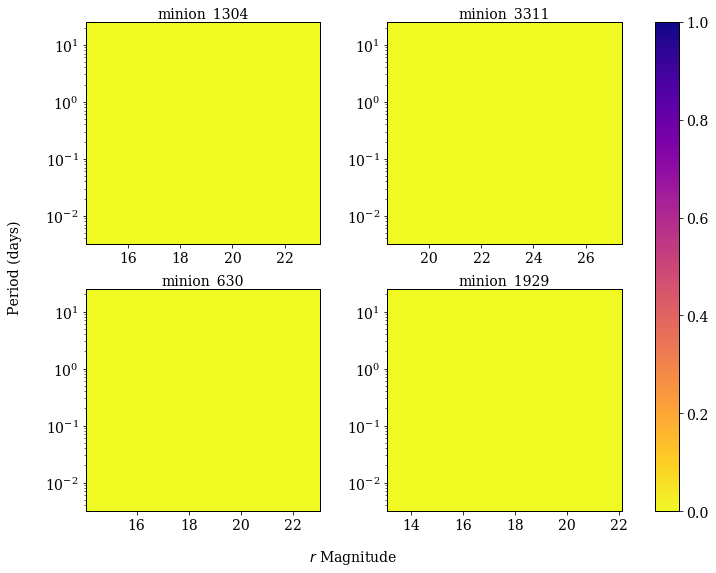

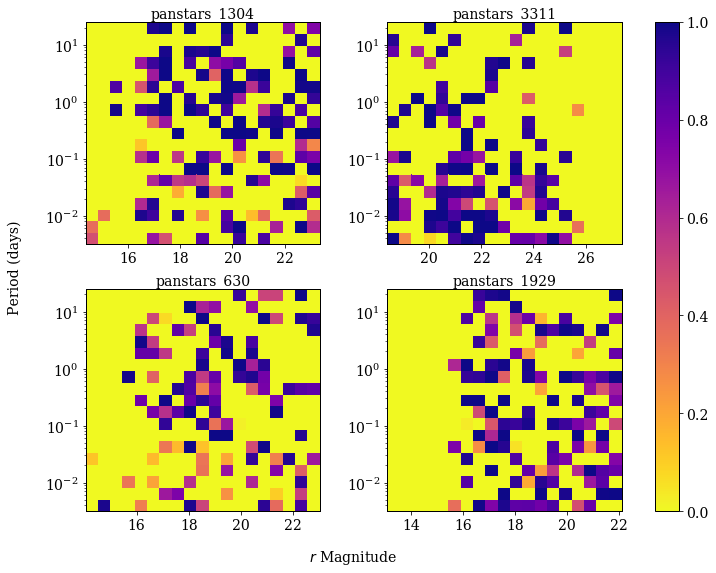

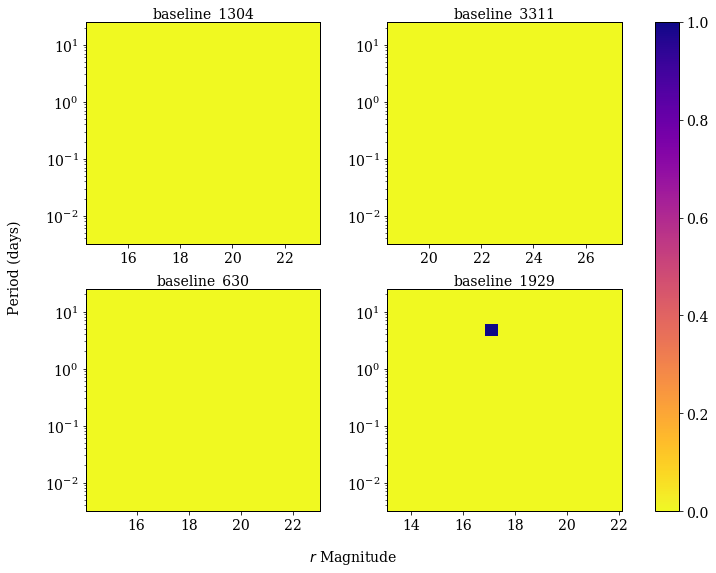

In [12]:
import matplotlib.gridspec as gridspec

#name = ['minion','minionOC','astro','panstars']
name = ['astro','minion','panstars','baseline'] #'minionOC',
number = ['1322','1304','3311','630','1929'] # '169']

for x in range(len(name)):
    fig = plt.figure(figsize=(12,9))
    font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}


    gs=gridspec.GridSpec(2,2000)

    plt.rc('axes',linewidth=0)
    ydis = 1.07
    fakeaxis=fig.add_subplot(gs[:,:])
    fakeaxis.set_yticks([])
    fakeaxis.set_xticks([])

    ax_list = fig.axes

    plt.rc('font', **font)
    plt.rc('axes',linewidth=1)
    
    
#     print(len(fullRed[(x*len(number))+1]))
#     print(len(fullRed[(x*len(number))+1][0]))
#     print(fullRed[(x*len(number))+1])
    
    p1=fig.add_subplot(gs[0,0:700])    
    im = p1.pcolor(fullRed[(x*len(number))+1],fullPeriod,sigLevels[(x*len(number))+1],cmap='plasma_r',vmin=0,vmax=1)
    p1.set_yscale('log')
    p1.set_ylabel(name[x]+'_'+number[1],rotation=0,va="top")
    p1.yaxis.set_label_coords(0.5,ydis)

    p2=fig.add_subplot(gs[0,900:1600])
    im = p2.pcolor(fullRed[(x*len(number))+2],fullPeriod,sigLevels[(x*len(number))+2],cmap='plasma_r',vmin=0,vmax=1)
    p2.set_yscale('log')
    p2.set_ylabel(name[x]+'_'+number[2],rotation=0,va="top")
    p2.yaxis.set_label_coords(0.5,ydis)

    p3=fig.add_subplot(gs[1,0:700])
    im = p3.pcolor(fullRed[(x*len(number))+3],fullPeriod,sigLevels[(x*len(number))+3],cmap='plasma_r',vmin=0,vmax=1)
    p3.set_yscale('log')
    p3.set_ylabel(name[x]+'_'+number[3],rotation=0,va="top")
    p3.yaxis.set_label_coords(0.5,ydis)

    p4=fig.add_subplot(gs[1,900:1600])
    im = p4.pcolor(fullRed[(x*len(number))+4],fullPeriod,sigLevels[(x*len(number))+4],cmap='plasma_r',vmin=0,vmax=1)
    p4.set_yscale('log')
    p4.set_ylabel(name[x]+'_'+number[4],rotation=0,va="top")
    p4.yaxis.set_label_coords(0.5,ydis)

    print(ax_list)

    #fig.colorbar(im, ax=ax.ravel().tolist())
    plt.sca(fakeaxis)
    plt.colorbar(im)
    fakeaxis.set_xlabel('$\it{r}$ Magnitude')
    fakeaxis.set_ylabel('Period (days)',labelpad=20)
    fakeaxis.yaxis.set_label_coords(-0.12, 0.5)
    #fakeaxis.set_label_coords(0.5,-0.1)
    #label = fakeaxis.set_xlabel('Xlabel', fontsize = 9)
    fakeaxis.xaxis.set_label_coords(0.5, -0.075)
    plt.savefig(name[x]+'New.png')
    plt.show()

In [98]:
#%matplotlib

FilterLabel = ['u','g','r','i','z','y']


im = plt.pcolor(fullMag,fullPeriod,sigLevels[0][0],cmap='plasma_r',vmin=0,vmax=1)
plt.yscale('log')
plt.colorbar(im)
font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}
plt.rc('font', **font)
plt.rc('axes',linewidth=2)
plt.xlabel('Magnitude')#,fontweight='semibold')
plt.ylabel('Period (days)')#,fontweight='semibold')
plt.title('X-ray Binary Period Recovery in all Filters',y=1.05)#,fontweight='semibold')

plt.show()


In [129]:
#sigLevels = [[valuefile.fullSigLevelastro1322,valuefile.fullSigLevelastro1304,valuefile.fullSigLevelastro3311,valuefile.fullSigLevelastro630,valuefile.fullSigLevelastro1929],[valuefile.fullSigLevelminion1322,valuefile.fullSigLevelminion1304,valuefile.fullSigLevelminion3311,valuefile.fullSigLevelminion630,valuefile.fullSigLevelminion1929],[valuefile.fullSigLevelminionOC1322,valuefile.fullSigLevelminionOC1304,valuefile.fullSigLevelminionOC3311,valuefile.fullSigLevelminionOC630,valuefile.fullSigLevelminionOC1929],[valuefile.fullSigLevelpanstars1322,valuefile.fullSigLevelpanstars1304,valuefile.fullSigLevelpanstars3311,valuefile.fullSigLevelpanstars630,valuefile.fullSigLevelpanstars1929],[valuefile.fullSigLevelbaseline1322,valuefile.fullSigLevelbaseline1304,valuefile.fullSigLevelbaseline3311,valuefile.fullSigLevelbaseline630,valuefile.fullSigLevelbaseline1929]]
sigLevels = [[valuefile.fullSigLevelastro1322,valuefile.fullSigLevelastro1304,valuefile.fullSigLevelastro3311,valuefile.fullSigLevelastro630,valuefile.fullSigLevelastro1929],[valuefile.fullSigLevelminion1322,valuefile.fullSigLevelminion1304,valuefile.fullSigLevelminion3311,valuefile.fullSigLevelminion630,valuefile.fullSigLevelminion1929],[valuefile.fullSigLevelpanstars1322,valuefile.fullSigLevelpanstars1304,valuefile.fullSigLevelpanstars3311,valuefile.fullSigLevelpanstars630,valuefile.fullSigLevelpanstars1929],[valuefile.fullSigLevelbaseline1322,valuefile.fullSigLevelbaseline1304,valuefile.fullSigLevelbaseline3311,valuefile.fullSigLevelbaseline630,valuefile.fullSigLevelbaseline1929]]


AttributeError: 'module' object has no attribute 'fullSigLevelastro1322'

In [129]:

newsigLevels = []
for x in range(len(sigLevels)/5):
    reformat = sigLevels[(x*5):(x*5)+5]
    newsigLevels.append(reformat)
sigLevels =newsigLevels

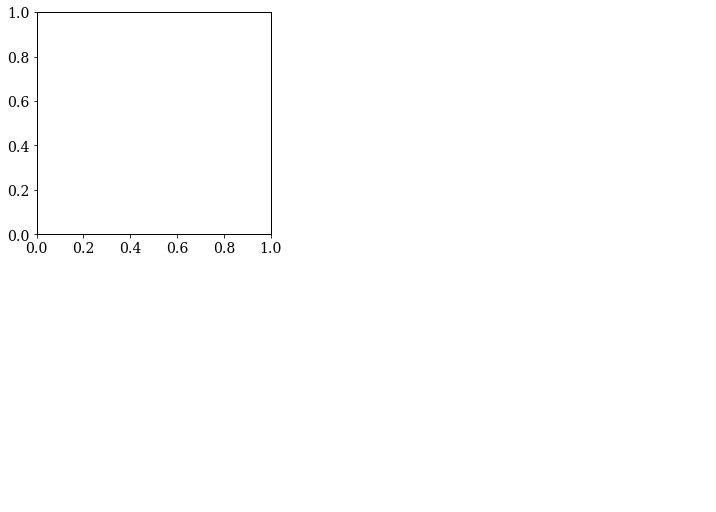

In [20]:
import matplotlib.gridspec as gridspec

#name = ['minion','minionOC','astro','panstars']
name = ['astro$\_$sim$\_$01$\_$1004','Minion$\_$1016','Minion$\_$1020','baseline2018a'] #'minionOC',
number = ['3311','1322','1304','630','1929'] # '169']

fig = plt.figure(figsize=(12,9))
font = {'family' : 'serif',
    'weight' : 'normal',
'size'   : 14}


gs=gridspec.GridSpec(2,2000)

plt.rc('axes',linewidth=0)
ydis = 1.07
fakeaxis=fig.add_subplot(gs[:,:])
fakeaxis.set_yticks([])
fakeaxis.set_xticks([])

ax_list = fig.axes

plt.rc('font', **font)
plt.rc('axes',linewidth=1)


#     print(len(fullRed[(x*len(number))+1]))
#     print(len(fullRed[(x*len(number))+1][0]))
#     print(fullRed[(x*len(number))+1])

p1=fig.add_subplot(gs[0,0:700])    
im = p1.pcolor(fullMag,fullPeriod,sigLevels[0][3],cmap='plasma_r',vmin=0,vmax=1)
p1.set_yscale('log')
p1.set_ylabel(name[x]+'_'+number[1],rotation=0,va="top")
p1.yaxis.set_label_coords(0.5,ydis)

p2=fig.add_subplot(gs[0,900:1600])
im = p2.pcolor(fullMag,fullPeriod,sigLevels[1][3],cmap='plasma_r',vmin=0,vmax=1)
p2.set_yscale('log')
p2.set_ylabel(name[x]+'_'+number[2],rotation=0,va="top")
p2.yaxis.set_label_coords(0.5,ydis)

p3=fig.add_subplot(gs[1,0:700])
im = p3.pcolor(fullMag,fullPeriod,sigLevels[1][3],cmap='plasma_r',vmin=0,vmax=1)
p3.set_yscale('log')
p3.set_ylabel(name[x]+'_'+number[3],rotation=0,va="top")
p3.yaxis.set_label_coords(0.5,ydis)

p4=fig.add_subplot(gs[1,900:1600])
im = p4.pcolor(fullMag,fullPeriod,sigLevels[3][3],cmap='plasma_r',vmin=0,vmax=1)
p4.set_yscale('log')
p4.set_ylabel(name[x]+'_'+number[4],rotation=0,va="top")
p4.yaxis.set_label_coords(0.5,ydis)

print(ax_list)

#fig.colorbar(im, ax=ax.ravel().tolist())
plt.sca(fakeaxis)
plt.colorbar(im)
fakeaxis.set_xlabel('$\it{r}$ Magnitude')
fakeaxis.set_ylabel('Period (days)',labelpad=20)
fakeaxis.yaxis.set_label_coords(-0.12, 0.5)
#fakeaxis.set_label_coords(0.5,-0.1)
#label = fakeaxis.set_xlabel('Xlabel', fontsize = 9)
fakeaxis.xaxis.set_label_coords(0.5, -0.075)
plt.savefig(name[x]+'New.png')
plt.show()

In [17]:
print(number)

['3311', '1322', '1304', '630', '1929']


In [130]:
#average[0][0] = astroSig[0][0][0] + astroSig [0][0][1]
#newav = [[0.]*20]*20
newav = [[]]*20
counter = 0

averageSigLevels = []

for strat in range(len(sigLevels)):
    newav = [[]]*3
    for z in range(1,len(sigLevels[strat])-1):
        siglist = []
        for x in range(20):
            sigval = 0.
            for y in range(20):
                sigval += sigLevels[strat][z][x][y]
                #print(sigval,y)
            sigval = sigval/(y+1)
            siglist.append(sigval)
        newav[z-1] = siglist
#     siglist = []
#     for x in range(20):
#         sigval = 0.
#         for y in range(20):
#             sigval += sigLevels[0][z][x][y]
#             #print(sigval,y)
#         sigval = sigval/(y+1)
#         siglist.append(sigval)
#     newav[-1] = siglist
    averageSigLevels.append(newav)

#print(averageSigLevels)

In [131]:
#average[0][0] = astroSig[0][0][0] + astroSig [0][0][1]
#newav = [[0.]*20]*20
newav = [[]]*20
counter = 0

averageSigLevels = []

for strat in range(len(sigLevels)):
    newav = [[]]*4
    for z in range(1,len(sigLevels[strat])-1):
        siglist = []
        for x in range(20):
            sigval = 0.
            for y in range(20):
                sigval += sigLevels[strat][z][x][y]
                #print(sigval,y)
            sigval = sigval/(y+1)
            siglist.append(sigval)
        newav[z-1] = siglist
    averageSigLevels.append(newav)

#print(averageSigLevels)

In [95]:
astrosigLevel = averageSigLevels[1]
print(astrosigLevel)
# astro1304,astro3311,astro630,astro1929
# 1.719 5.73 1.398 0.054


# 1304 1322 630 169 1929 3311
# Ar 1.719 13.94 1.398 0.054 0.437 5.73
Ar = [1.719,5.73,1.398,0.054]
for x in range(len(astrosigLevel[0])):
    for y in range(len(astrosigLevel)):
        plt.plot(Ar[x],astrosigLevel[y][x],'o')
        
    plt.xlabel('Ar (mags)')
    plt.ylabel('Significance')
    plt.show()

[[0.39670000000000005, 0.0, 0.34530000000000005, 0.34904999999999997, 0.298, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0993, 0.34345000000000003, 0.59985, 0.39305, 0.85, 0.7, 0.6, 0.85, 0.8, 0.5, 0.8, 0.85, 0.55, 0.29995000000000005, 0.65, 0.65, 0.6, 0.79785, 0.7, 0.6999500000000001], [0.19305, 0.04975, 0.39985, 0.8499500000000001, 0.7, 0.85, 0.8996000000000001, 0.6, 0.9, 0.79985, 0.9, 0.9, 1.0, 0.8, 0.49995, 0.85, 0.65, 0.5, 0.89985, 0.85], []]


IndexError: list index out of range

In [98]:
len(astrosigLevel)

20

14.3690699


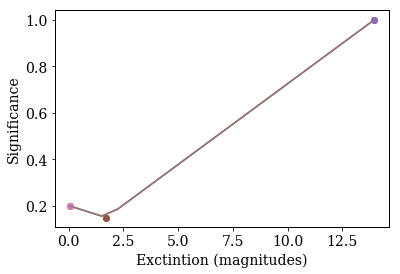

14.8427541105


15.3164383211


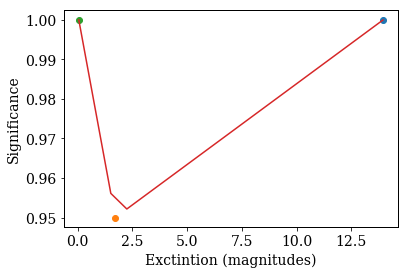

15.7901225316


16.2638067421


16.7374909526


17.2111751632


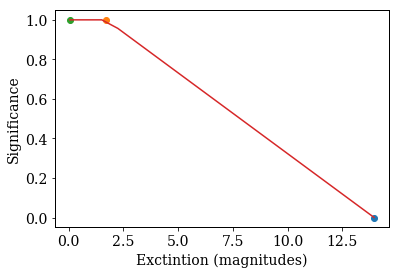

17.6848593737


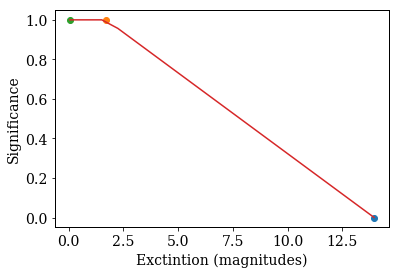

18.1585435842


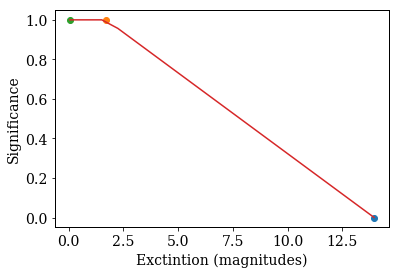

18.6322277947


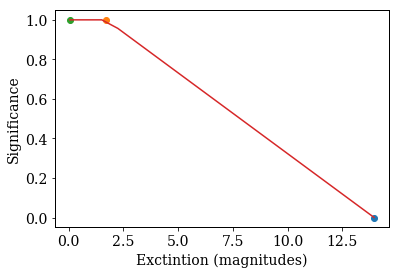

19.1059120053


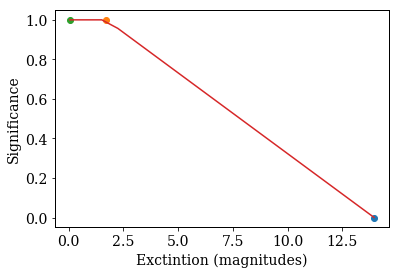

19.5795962158


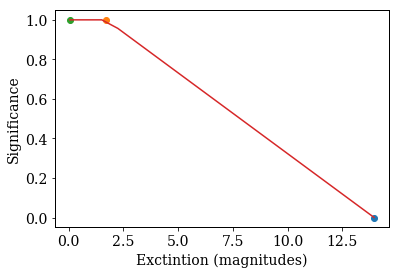

20.0532804263


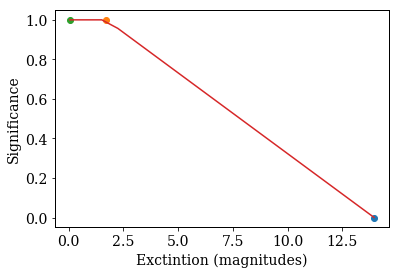

20.5269646368


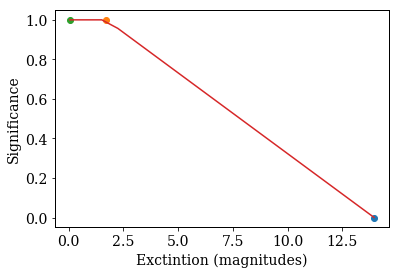

21.0006488474


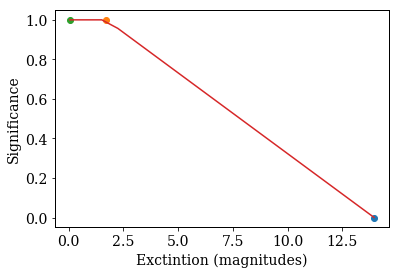

21.4743330579


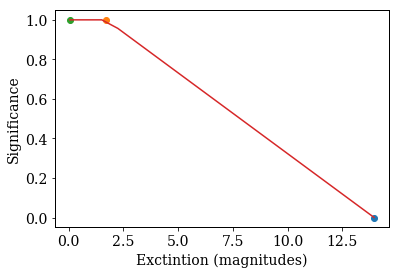

21.9480172684


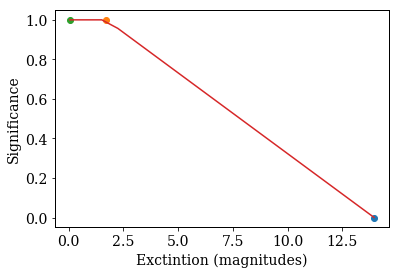

22.4217014789


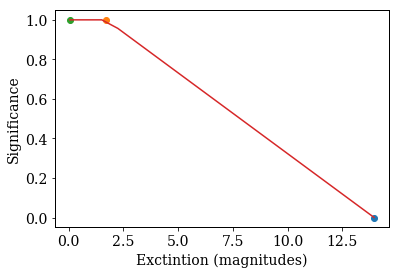

22.8953856895


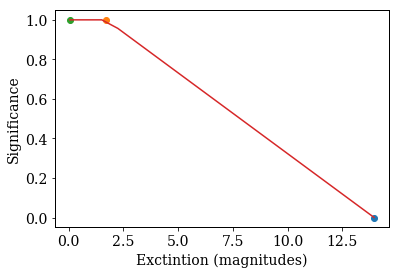

23.3690699


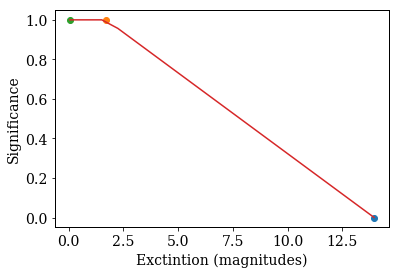

14.3690699


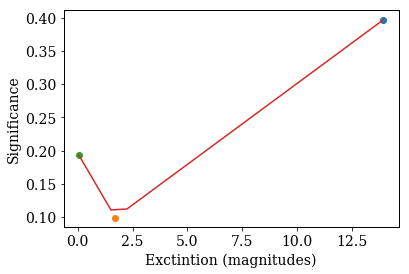

14.8427541105


15.3164383211


15.7901225316


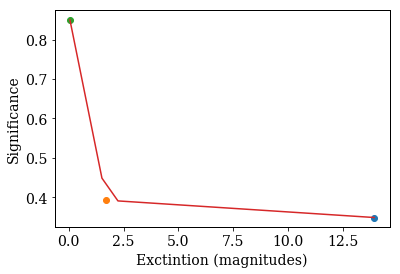

16.2638067421


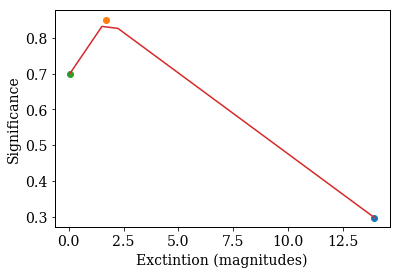

16.7374909526


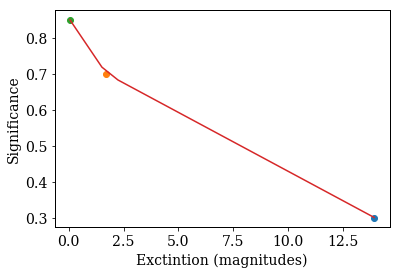

17.2111751632


17.6848593737


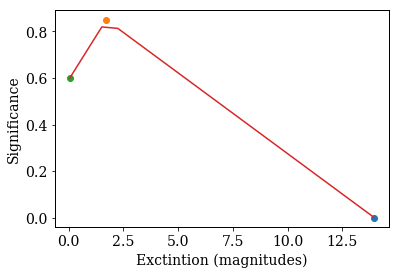

18.1585435842


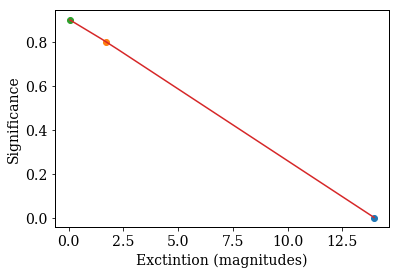

18.6322277947


19.1059120053


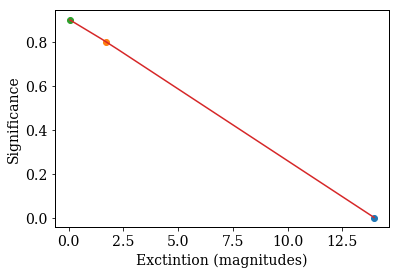

19.5795962158


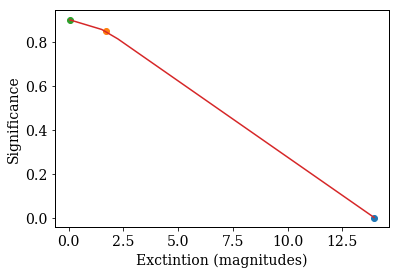

20.0532804263


20.5269646368


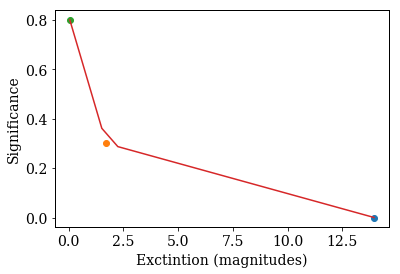

21.0006488474


21.4743330579


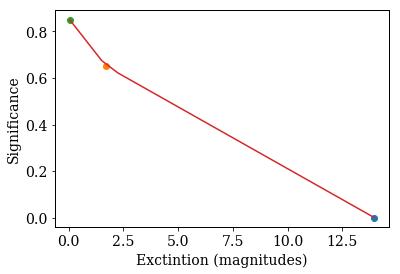

21.9480172684


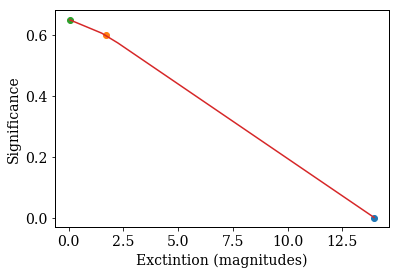

22.4217014789


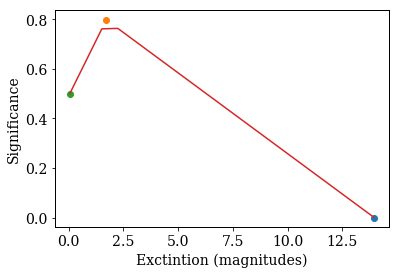

22.8953856895


23.3690699


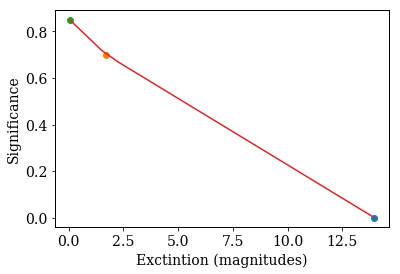

14.3690699


14.8427541105


15.3164383211


15.7901225316


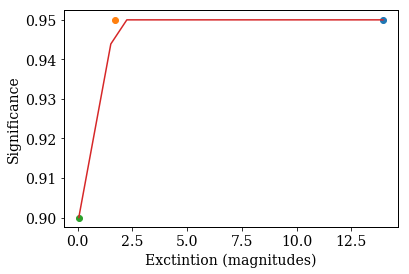

16.2638067421


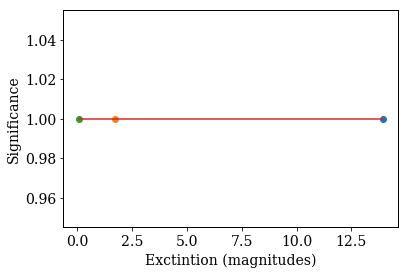

16.7374909526


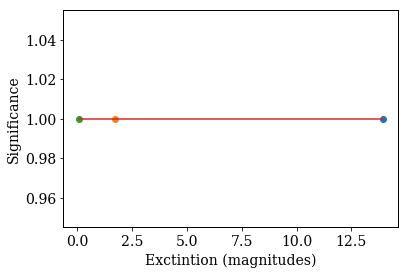

17.2111751632


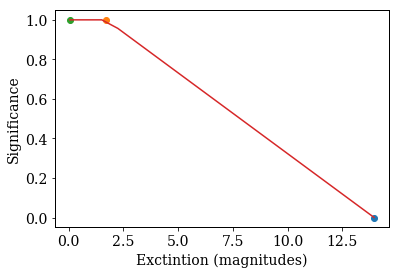

17.6848593737


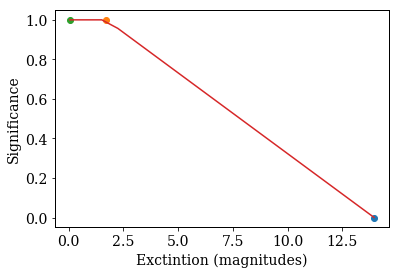

18.1585435842


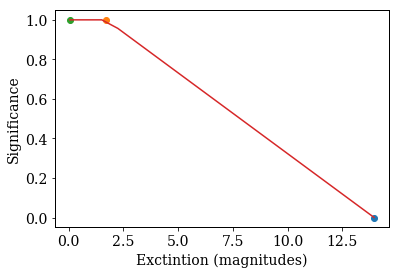

18.6322277947


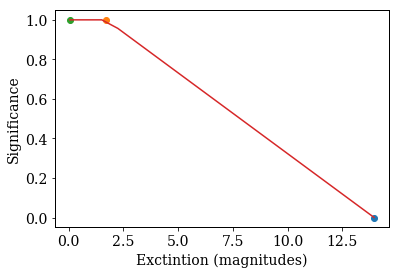

19.1059120053


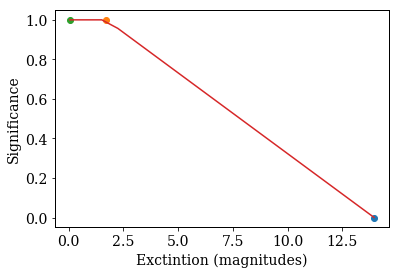

19.5795962158


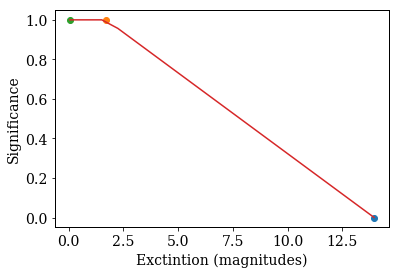

20.0532804263


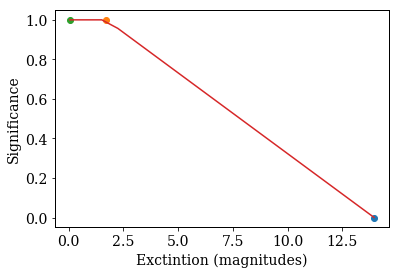

20.5269646368


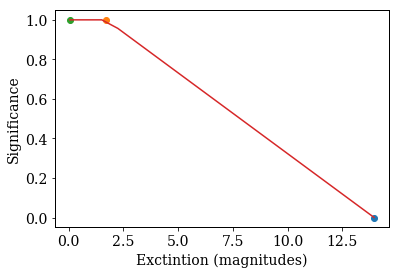

21.0006488474


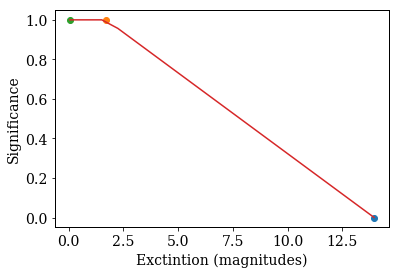

21.4743330579


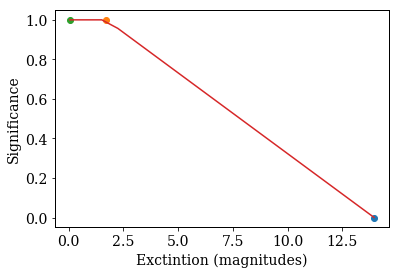

21.9480172684


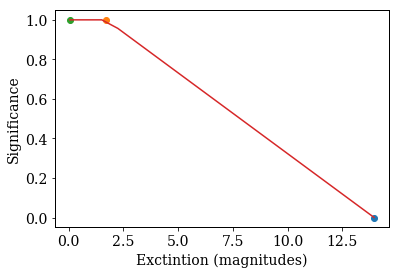

22.4217014789


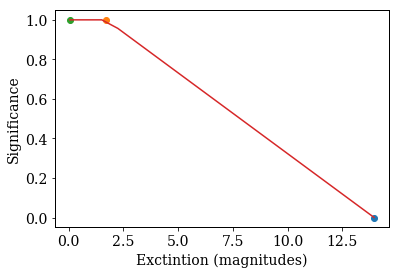

22.8953856895


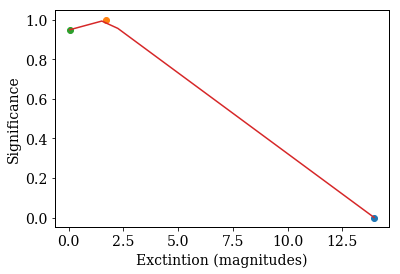

23.3690699


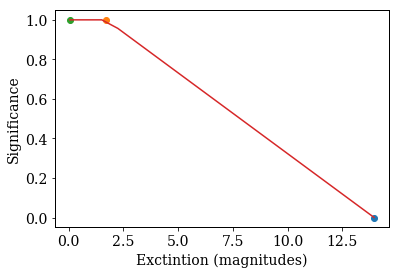

14.3690699


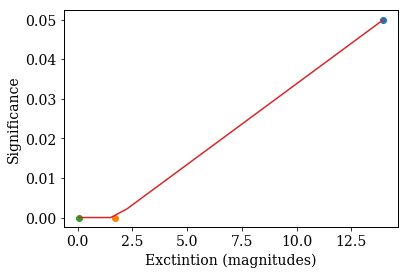

14.8427541105


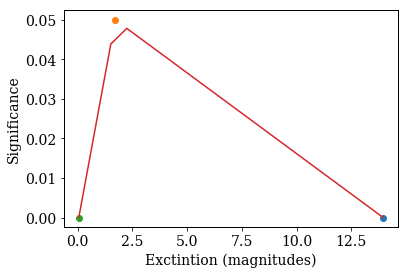

15.3164383211


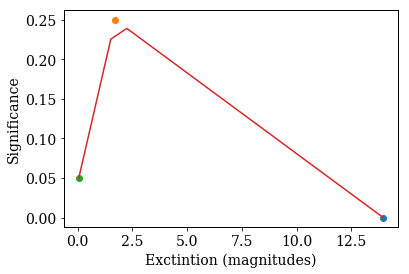

15.7901225316


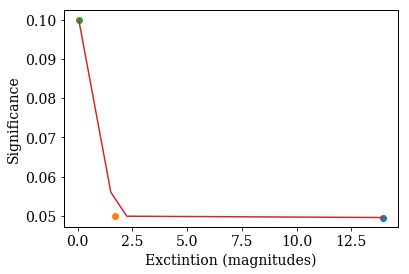

16.2638067421


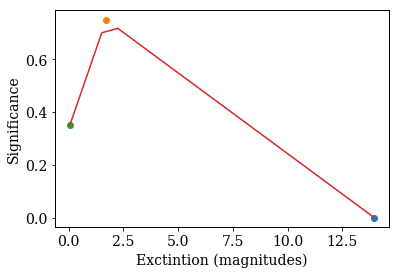

16.7374909526


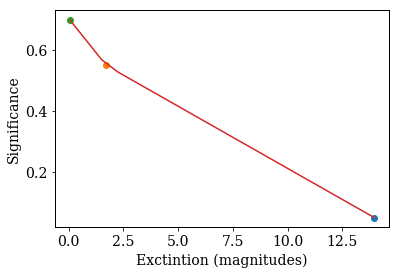

17.2111751632


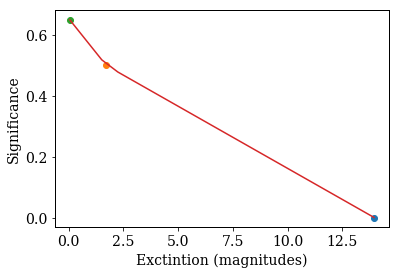

17.6848593737


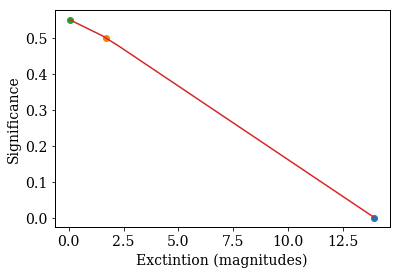

18.1585435842


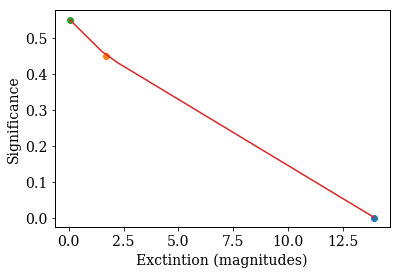

18.6322277947


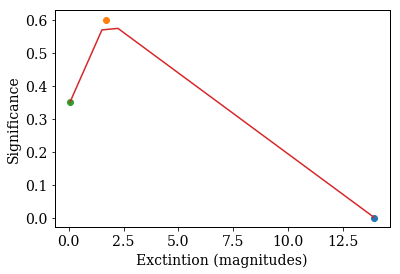

19.1059120053


19.5795962158


20.0532804263


20.5269646368


21.0006488474


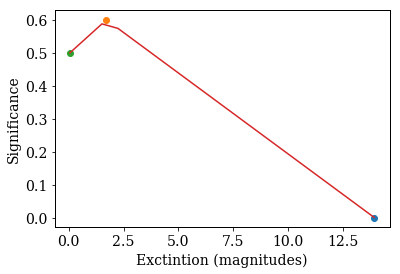

21.4743330579


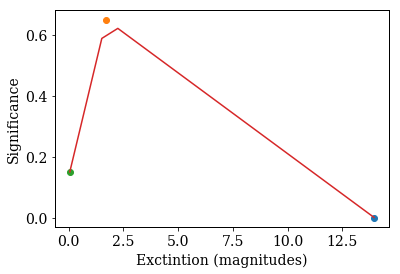

21.9480172684


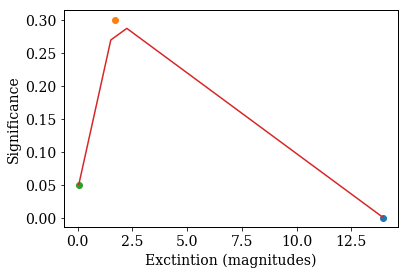

22.4217014789


22.8953856895


23.3690699


In [135]:
# Ar 1.719 13.94 1.398 0.054 0.437 5.73
number = ['3311','1322','1304','630','1929'] # '169']

Ar = [13.9462188,1.719,0.054] #,1.398] #,5.73]
#Ar
reddening = np.linspace(0.054,13.94,20)

fullSigLevelsRedPeriod = []
fullSigRedMag = []

for strat in range(len(averageSigLevels)):
    astrosigLevel = averageSigLevels[strat]
    reformat = [[]]*len(reddening)
    finalsig = []
    for i,item in enumerate(reddening):
        sig = []
        if item >= Ar[2] and item < Ar[1]:
            Y = [a-b for a,b in zip(astrosigLevel[1],astrosigLevel[2])]
            X = Ar[1]-Ar[2]
            m = [slope/X for slope in Y]
            sig = [y+(slope*(item-Ar[2])) for y,slope in zip(astrosigLevel[2],m)]
#         elif item >= Ar[3] and item < Ar[1]:
#             Y = [a-b for a,b in zip(astrosigLevel[1],astrosigLevel[3])]
#             X = Ar[3]-Ar[1]
#             m = [slope/X for slope in Y]
#             sig = [y+(slope*(item-Ar[3])) for y,slope in zip(astrosigLevel[3],m)]
        elif item >= Ar[1] and item < Ar[0]:
            Y = [a-b for a,b in zip(astrosigLevel[0],astrosigLevel[1])]
            X = Ar[0]-Ar[1]
            m = [slope/X for slope in Y]
            sig = [y+(slope*(item-Ar[1])) for y,slope in zip(astrosigLevel[1],m)]
        elif item >= Ar[0]:
            Y = [-x for x in astrosigLevel[0]]
            X = 14-Ar[0]
            m = [slope/X for slope in Y]
            sig = [y+(slope*(item-Ar[0])) for y,slope in zip(astrosigLevel[0],m)]
#         elif item >= Ar[4]:
#             Y = [-x for x in astrosigLevel[4]]
#             X = 14-Ar[4]
#             m = [slope/X for slope in Y]
#             sig = [y+(slope*(item-Ar[4])) for y,slope in zip(astrosigLevel[4],m)]
#         #print(sig)
        for cycle in range(len(sig)):
            if sig[cycle] < 0.:
                sig[cycle] = 0.
        #print(sig)
    #     if len(sig) != 20:
    #         print 'whoa now'
    #     for z in range(len(sig)):
    #         reformat[z][i] = sig[z]

        finalsig.append(sig)
    fullSigLevelsRedPeriod.append(finalsig)
    reformat = []
    for x in range(len(finalsig)):
        newsig = []
        for y in range(len(finalsig[x])):
            newsig.append(finalsig[y][x])
        reformat.append(newsig)
    fullSigRedMag.append(reformat)
    for x in range((20)):
        for y in range(len(Ar)):
            plt.plot(Ar[y],astrosigLevel[y][x],'o')
        print(fullMag[x][0])
        plt.ylabel('Significance')
        plt.xlabel('Exctintion (magnitudes)')
        plt.plot(reddening,reformat[x])
        if strat == 0:
            plt.savefig('redsig'+str(fullMag[x][0])+name[strat]+'.png')
        plt.show()

In [37]:
fullRed = []
for i,item in enumerate(reddening):
    fullRed.append([item]*20)
#print(fullRed)

In [38]:
fullRed = [reddening]*20

In [39]:
#%matplotlib

FilterLabel = ['u','g','r','i','z','y']


im = plt.pcolor(fullMag,fullRed,finalsig,cmap='plasma_r',vmin=0,vmax=1)
#plt.yscale('log')
plt.colorbar(im)
font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}
plt.rc('font', **font)
plt.rc('axes',linewidth=2)
plt.xlabel('Reddening')#,fontweight='semibold')
plt.ylabel('Period (days)')#,fontweight='semibold')
plt.title('X-ray Binary Period Recovery in all Filters',y=1.05)#,fontweight='semibold')

plt.show()

In [40]:
#astro minion minionOC panstars baseline

fig = plt.figure(figsize=(12,9))
#ax = plt.gca()

import matplotlib.gridspec as gridspec

gs=gridspec.GridSpec(2,2000)

plt.rc('axes',linewidth=0)
ydis = 1.07
fakeaxis=fig.add_subplot(gs[:,:])
fakeaxis.set_yticks([])
fakeaxis.set_xticks([])

ax_list = fig.axes

plt.rc('font', **font)
plt.rc('axes',linewidth=1)

p1=fig.add_subplot(gs[0,0:700])
im = p1.pcolor(fullMag,fullRed,fullSigRedMag[0],cmap='plasma_r',vmin=0,vmax=1)
#p1.set_yscale('log')
p1.set_ylabel('astro$\_$sim$\_$01$\_$1004',rotation=0,va="top")
p1.yaxis.set_label_coords(0.5,ydis)

font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}

#plt.xlabel('Magnitude')#,fontweight='semibold')
# plt.ylabel('Period (days)')#,fontweight='semibold')
#plt.title('X-ray Binary Period Recovery in all Filters',y=1.05,x=1.0)#,fontweight='semibold')

p2=fig.add_subplot(gs[0,900:1600])
im = p2.pcolor(fullMag,fullRed,fullSigRedMag[1],cmap='plasma_r',vmin=0,vmax=1)
#p2.set_yscale('log')
p2.set_ylabel('Minion$\_$1016',rotation=0,va="top")
p2.yaxis.set_label_coords(0.5,ydis)

p3=fig.add_subplot(gs[1,0:700])
im = p3.pcolor(fullMag,fullRed,fullSigRedMag[2],cmap='plasma_r',vmin=0,vmax=1)
#p3.set_yscale('log')
p3.set_ylabel('Minion$\_$1020',rotation=0,va="top")
p3.yaxis.set_label_coords(0.5,ydis)

p4=fig.add_subplot(gs[1,900:1600])
im = p4.pcolor(fullMag,fullRed,fullSigRedMag[3],cmap='plasma_r',vmin=0,vmax=1)
#p4.set_yscale('log')
p4.set_ylabel('baseline2018a',rotation=0,va="top")
p4.yaxis.set_label_coords(0.5,ydis)

print(ax_list)

#fig.colorbar(im, ax=ax.ravel().tolist())
plt.sca(fakeaxis)
plt.colorbar(im)
fakeaxis.set_ylabel('A $\it{r}$ Reddening')
fakeaxis.set_xlabel('$\it{r}$ Magnitude',labelpad=20)
fakeaxis.yaxis.set_label_coords(-0.12, 0.5)
#fakeaxis.set_label_coords(0.5,-0.1)
#label = fakeaxis.set_xlabel('Xlabel', fontsize = 9)
fakeaxis.xaxis.set_label_coords(0.5, -0.075)

plt.savefig('allGsRedMag.png',dpi=300,bbox_inches='tight')
plt.show()

In [41]:
print((fullSigRedMag[2][0]))

[0.0, 0.04408408408408408, 0.08816816816816817, 0.13952656838037442, 0.19355357246081176, 0.2475805765412491, 0.30160758062168647, 0.3556345847021237, 0.4096615887825611, 0.46368859286299846, 0.5177155969434357, 0.5717426010238731, 0.6257696051043103, 0.6797966091847477, 0.7338236132651851, 0.7878506173456225, 0.8418776214260597, 0.8959046255064971, 0.9499316295869343, 0.0]


In [42]:
def rfromRV(R,V):
    r = (0.34)*(V-R)+0.015 + R
    return r
rM = rfromRV(4.04,4.680)
#rM = rfromRV(2.67,3.59)
print(rM)

4.2726


In [43]:
#bayestar = BayestarQuery(max_samples=2)
m = sfdmap.SFDMap('/home/mj1e16/DUST_DIR/sfddata-master/sfd')

In [44]:
def findWeight(l,b,r,rM,m=m):
    rogrim,rtgrim,rdgrim,rzgrim,rmgrim,gamma,bulge,disc,sphere,Rc,q = 1.,1.9,3.5,0.41,6.5,1.8,1.,2.,0.3,2.8,0.6
    milkyWayRadius = 15.
    scaleHeight = 3.5
    bSphere = 7.669
    
    magrange = np.linspace(13,22,20)
    redrange = np.linspace(0.054,14,20)
    ebv=[]
    
    R = 2.273
    Rd = 3 #kpc
    
    ebv = m.ebv(l,b, frame='galactic', unit='degree', interpolate=False)

    mag = (5*np.log10((r*(1000/10)))+rM)
    reddening = ((ebv)*R)
    
    radius = r * np.cos(np.deg2rad(b))
    thickness = r * np.sin(np.deg2rad(b))
                   
    xlen = (((radius*np.cos(np.deg2rad(l)))-8))
    ylen = ((radius*np.sin(np.deg2rad(l))))
    dist = ((xlen**2)+(ylen**2))**0.5
    #rad = dist/np.cos(np.deg2rad(b))
    rad = ((dist**2)+(thickness**2))**0.5
    
    Bulge = (bulge*(((((dist**2)+((thickness**2)/(q**2)))**0.5)/rogrim)**(-gamma))*np.exp(-(((dist**2)+((thickness**2)/(q**2)))/rtgrim**2)))
    Disc = (disc*(np.exp((-rmgrim/dist)-(dist/rdgrim)-(abs(thickness)/rzgrim))))
    Sphere = (sphere*(np.exp(-bSphere*((rad/Rc)**0.25))))/((rad/Rc)**(7/8))
    
    magbin = -1
    redbin = -1
    for x,item in enumerate(magrange):
        if ebv <= redrange[0]:
            redbin = 0     
        if x < 19:
            if mag >= magrange[x] and mag <= magrange[x+1]:
                magbin = x
            if ebv >= redrange[x] and ebv <= redrange[x+1]:
                redbin = x
        else:
            if mag >= magrange[x] and mag <= magrange[19]:
                magbin = x
            if ebv >= redrange[x] and ebv <= redrange[19]:
                redbin = x
         
    
    results = {}
    results[0] = [xlen,ylen,thickness]
    results[1] = mag
    results[2] = magbin
    results[3] = ebv
    results[4] = redbin
    results[5] = [Bulge,Disc,Sphere]
    
    return results

In [45]:
#sigLevels = [[valuefile.fullSigLevelastro1322,valuefile.fullSigLevelastro1304,valuefile.fullSigLevelastro3311,valuefile.fullSigLevelastro630,valuefile.fullSigLevelastro1929],[valuefile.fullSigLevelminion1322,valuefile.fullSigLevelminion1304,valuefile.fullSigLevelminion3311,valuefile.fullSigLevelminion630,valuefile.fullSigLevelminion1929],[valuefile.fullSigLevelminionOC1322,valuefile.fullSigLevelminionOC1304,valuefile.fullSigLevelminionOC3311,valuefile.fullSigLevelminionOC630,valuefile.fullSigLevelminionOC1929],[valuefile.fullSigLevelpanstars1322,valuefile.fullSigLevelpanstars1304,valuefile.fullSigLevelpanstars3311,valuefile.fullSigLevelpanstars630,valuefile.fullSigLevelpanstars1929],[valuefile.fullSigLevelbaseline1322,valuefile.fullSigLevelbaseline1304,valuefile.fullSigLevelbaseline3311,valuefile.fullSigLevelbaseline630,valuefile.fullSigLevelbaseline1929]]

In [46]:
astrosigLevel = sigLevels[0]

In [47]:
noSteps =50
l = np.linspace(0.1,30.1,noSteps)
print(l[13])

8.059183673469388


In [48]:
def threeDintegrate(l,b,r,dr):
    volume = (4.*((r+dr)**3)*np.sin(np.deg2rad(l))*np.sin(np.deg2rad(b))) - (4.*((r-dr)**3)*np.sin(np.deg2rad(l))*np.sin(np.deg2rad(b)))
    #print(np.sin(np.deg2rad(l))*np.sin(np.deg2rad(b)))
    return volume

3.76596593857


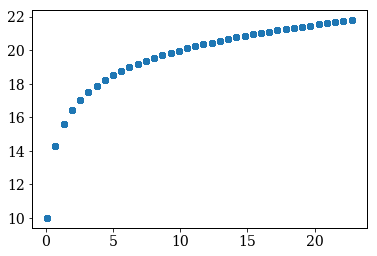

In [49]:
t0 = time.time()
noSteps = 50
#b = [0]
b = np.linspace(-90.,90,noSteps)#18)
l = np.linspace(0., 360., noSteps)#181)
radialDistance = np.linspace(0.1,30.1,noSteps)#15)
dr = (radialDistance[-1]-radialDistance[0])/noSteps
dl = 0.5*(l[-1]-(l[0]))/noSteps
db =0.5*(b[-1]-(b[0]))/noSteps
#b = [0.]
dist = []
coords = []
mag = []
finalResult = []
volumeSegment = []
rM = 5
xcoords = []
ycoords = []
colour = []
red = []
probabilities = []

magrange = np.linspace(13,22,20)
resultList = []
for x,angle in enumerate(l):
    resultPerB = []
    for lat,lattitude in enumerate(b):
        resultPerD = []
        for y,item in enumerate(radialDistance):
            radius = item * np.cos(np.deg2rad(lattitude))
            xlen = (((radius*np.cos(np.deg2rad(angle)))-8))
            ylen = ((radius*np.sin(np.deg2rad(angle))))
            Dist = ((xlen**2)+(ylen**2))**0.5
            width = Dist
            thickness = item * np.sin(np.deg2rad(lattitude))
            distancefromcentre = ((thickness**2)+(Dist**2))**0.5
            if abs(width) < 15 and abs(thickness) < 1.:# and distancefromcentre > 1.:
                result = findWeight(angle,lattitude,item,rM)
                resultList.append(result)
                coords.append(result[0])
                distance = ((result[0][0]**2)+(result[0][1]**2))**0.5
                dist.append(item)
                mag.append(result[1])
                xcoords.append(xlen)
                ycoords.append(ylen)
                probabilities.append(result[5])
                volumeSegment.append(threeDintegrate(dl,db,item,dr))
                #red.append(result[3])
# #                     print('thick boye', thickness)
#                     print('wide boye',width)
    
                
                resultPerD.append(result)
        resultPerB.append(resultPerD)
    finalResult.append(resultPerB)
t1 =time.time()
print(t1-t0)
plt.plot(dist,mag,'o') 
plt.show()

In [50]:
bulgecumalative = 0
disccumalative = 0
spherecumalative = 0

bulgeprob = []
discprob = []
sphereprob = []

for x in range(len(probabilities)):
    bulgecumalative += probabilities[x][0]*volumeSegment[x]
    bulgeprob.append(probabilities[x][0]*volumeSegment[x])
    disccumalative += probabilities[x][1]*volumeSegment[x]
    discprob.append(probabilities[x][1]*volumeSegment[x])
    spherecumalative += probabilities[x][2]*volumeSegment[x]
    sphereprob.append(probabilities[x][2]*volumeSegment[x])
    
bulgenormalised = [(1*x)/bulgecumalative for x in bulgeprob]
discnormalised = [(2*x)/disccumalative for x in discprob]
spherenormalised = [(0.3*x)/spherecumalative for x in sphereprob]




print(sum(bulgenormalised),sum(discnormalised),sum(spherenormalised))

totalprob = map(sum, zip(bulgenormalised,discnormalised,spherenormalised)) #bulgenormalised,

normalisation = (sum(totalprob))
normalisedprob = [x/normalisation for x in totalprob]

colour = normalisedprob
print(sum(normalisedprob))

1.0000000000000007 1.9999999999999971 0.2999999999999972
1.000000000000004


In [51]:
print(max(bulgeprob))
print(max(discprob))
print(max(sphereprob))

7.880224420200806
0.2298114145207036
0.007907925386208539


1.9999999999999971
1.0000000000000007
0.2999999999999972


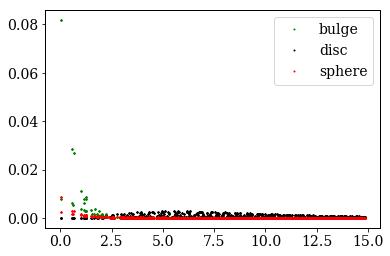

In [52]:
r = [((x**2)+(y**2))**0.5 for x,y in zip(xcoords,ycoords)]
print(sum(discnormalised))
print(sum(bulgenormalised))
print(sum(spherenormalised))


plt.plot(r,bulgenormalised,'go',markersize=1.0,label='bulge')
plt.plot(r,discnormalised,'ko',markersize=1.0,label='disc')
plt.plot(r,spherenormalised,'ro',markersize=1.0,label='sphere')
#plt.plot(r,normalisedprob,'bo',markersize=1.0,label='total')
# plt.yscale('log')
# plt.xscale('log')
plt.savefig('2dplot.png')
plt.legend()
plt.show()

/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2.


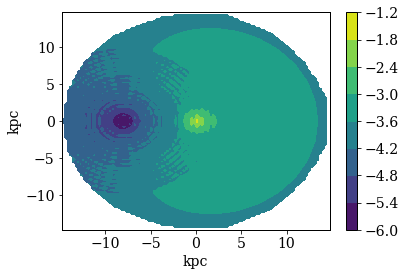

In [53]:
def grid(x, y, z, resX=100, resY=100):
    "Convert 3 column data to matplotlib grid"
    xi = np.linspace(min(x), max(x), resX)
    yi = np.linspace(min(y), max(y), resY)
    Z = griddata(x, y, z, xi, yi,interp='linear')
    X, Y = np.meshgrid(xi, yi)
    return X, Y, Z

colourLog= [np.log10(value) for value in colour]
X, Y, Z = grid(xcoords, ycoords, colourLog)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.xlabel('kpc')
plt.ylabel('kpc')
plt.show()

/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2.


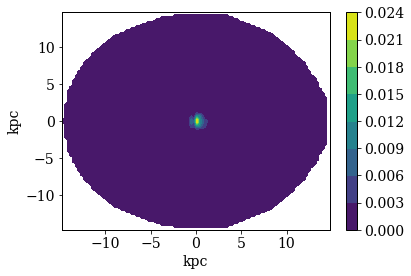

In [75]:
def grid(x, y, z, resX=100, resY=100):
    "Convert 3 column data to matplotlib grid"
    xi = np.linspace(min(x), max(x), resX)
    yi = np.linspace(min(y), max(y), resY)
    Z = griddata(x, y, z, xi, yi,interp='linear')
    X, Y = np.meshgrid(xi, yi)
    return X, Y, Z

#colourLog= [np.log10(value) for value in colour]
X, Y, Z = grid(xcoords, ycoords, colour)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.xlabel('kpc')
plt.ylabel('kpc')
plt.show()

In [ ]:
sigLevels = [[valuefile.fullSigLevelastro1322,valuefile.fullSigLevelastro1304,valuefile.fullSigLevelastro3311,valuefile.fullSigLevelastro630,valuefile.fullSigLevelastro1929],[valuefile.fullSigLevelminion1322,valuefile.fullSigLevelminion1304,valuefile.fullSigLevelminion3311,valuefile.fullSigLevelminion630,valuefile.fullSigLevelminion1929],[valuefile.fullSigLevelpanstars1322,valuefile.fullSigLevelpanstars1304,valuefile.fullSigLevelpanstars3311,valuefile.fullSigLevelpanstars630,valuefile.fullSigLevelpanstars1929],[valuefile.fullSigLevelbaseline1322,valuefile.fullSigLevelbaseline1304,valuefile.fullSigLevelbaseline3311,valuefile.fullSigLevelbaseline630,valuefile.fullSigLevelbaseline1929]]

In [ ]:
## what are the numbers of the siglevels, make sure note to propagte 1929

In [54]:
# Ar 1.719 13.94 1.398 0.054 0.437 5.73
number = ['3311','1322','1304','630','1929'] # '169']

Ar = [13.9462188,1.719,0.054] #,1.398] #,5.73]
Ar
reddening = np.linspace(0.054,13.94,20)

# fullSigLevelsRedPeriod = []
# fullSigRedMag = []
# reddening = np.linspace(0.054,14,20)


fullSigPeriodMag = []
for strat in range(len(averageSigLevels)):
    astrosigLevel = averageSigLevels[strat]
    #reformat = [[]]*len(reddening)
    magsig = []
    for i,item in enumerate(reddening):
        redsig = []
        if item >= Ar[2] and item < Ar[1]:
            Y = [a-b for a,b in zip(astrosigLevel[1],astrosigLevel[2])]
            X = Ar[1]-Ar[2]
            m = [slope/X for slope in Y]
            sig = [y+(slope*(item-Ar[2])) for y,slope in zip(astrosigLevel[2],m)]
#         elif item >= Ar[3] and item < Ar[1]:
#             Y = [a-b for a,b in zip(astrosigLevel[1],astrosigLevel[3])]
#             X = Ar[3]-Ar[1]
#             m = [slope/X for slope in Y]
#             sig = [y+(slope*(item-Ar[3])) for y,slope in zip(astrosigLevel[3],m)]
        elif item >= Ar[1] and item < Ar[0]:
            Y = [a-b for a,b in zip(astrosigLevel[0],astrosigLevel[1])]
            X = Ar[0]-Ar[1]
            m = [slope/X for slope in Y]
            sig = [y+(slope*(item-Ar[1])) for y,slope in zip(astrosigLevel[1],m)]
        elif item >= Ar[0]:
            Y = [-x for x in astrosigLevel[0]]
            X = 14-Ar[0]
            m = [slope/X for slope in Y]
            sig = [y+(slope*(item-Ar[0])) for y,slope in zip(astrosigLevel[0],m)]
#         elif item >= Ar[4]:
#             Y = [-x for x in astrosigLevel[4]]
#             X = 14-Ar[4]
#             m = [slope/X for slope in Y]
#             sig = [y+(slope*(item-Ar[4])) for y,slope in zip(astrosigLevel[4],m)]
#         #print(sig)
        for cycle in range(len(sig)):
            if sig[cycle] < 0.:
                sig[cycle] = 0.
        #print(sig)
    #     if len(sig) != 20:
    #         print 'whoa now'
    #     for z in range(len(sig)):
    #         reformat[z][i] = sig[z]

            #print(sig)
        #     if len(sig) != 20:
        #         print 'whoa now'
        #     for z in range(len(sig)):
        #         reformat[z][i] = sig[z]

            redsig.append(sig)
        magsig.append(redsig)
    fullSigPeriodMag.append(magsig)


In [55]:
# # Ar 1.719 13.94 1.398 0.054 0.437 5.73
# Ar = [1.719,5.73,1.398,0.054]

# reddening = np.linspace(0.054,14,20)


# fullSigPeriodMag = []
# for strat in range(len(sigLevels)):
#     astrosigLevel = sigLevels[strat][1:]
#     magsig = []
#     for newCycle in range(20):
#         redsig = []
#         for i,item in enumerate(reddening):
#             sig = []
#             if item >= Ar[3] and item < Ar[2]:
#                 Y = [a-b for a,b in zip(astrosigLevel[2][newCycle],astrosigLevel[3][newCycle])]
#                 X = Ar[2]-Ar[3]
#                 m = [slope/X for slope in Y]
#                 sig = [y+(slope*(item-Ar[3])) for y,slope in zip(astrosigLevel[3][newCycle],m)]
#             elif item >= Ar[2] and item < Ar[0]:
#                 Y = [a-b for a,b in zip(astrosigLevel[0][newCycle],astrosigLevel[2][newCycle])]
#                 X = Ar[0]-Ar[2]
#                 m = [slope/X for slope in Y]
#                 sig = [y+(slope*(item-Ar[2])) for y,slope in zip(astrosigLevel[2][newCycle],m)]
#             elif item >= Ar[0] and item < Ar[1]:
#                 Y = [a-b for a,b in zip(astrosigLevel[1][newCycle],astrosigLevel[0][newCycle])]
#                 X = Ar[1]-Ar[0]
#                 m = [slope/X for slope in Y]
#                 sig = [y+(slope*(item-Ar[0])) for y,slope in zip(astrosigLevel[0][newCycle],m)]
#             elif item >= Ar[1]:
#                 Y = [-x for x in astrosigLevel[1][newCycle]]
#                 X = 14-Ar[1]
#                 m = [slope/X for slope in Y]
#                 sig = [y+(slope*(item-Ar[1])) for y,slope in zip(astrosigLevel[1][newCycle],m)]
#             #print(sig)
#             for cycle in range(len(sig)):
#                 if sig[cycle] < 0.:
#                     sig[cycle] = 0.
#             #print(sig)
#         #     if len(sig) != 20:
#         #         print 'whoa now'
#         #     for z in range(len(sig)):
#         #         reformat[z][i] = sig[z]

#             redsig.append(sig)
#         magsig.append(redsig)
#     fullSigPeriodMag.append(magsig)
            
            

In [56]:
for x in range(len(fullSigPeriodMag)):
    sumstrat = 0
    for y in range(len(fullSigPeriodMag[x])):
        for z in range(len(fullSigPeriodMag[x][y])):
            sumstrat += sum(fullSigPeriodMag[x][y][z])
    print((sumstrat))

5120.176600122005
3062.5397619328146
5060.874998733911
1784.8532796119014


/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in log10


-0.1208981770982863 0.4670578273600963


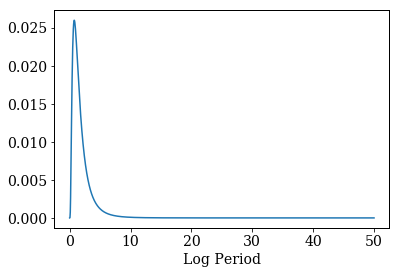

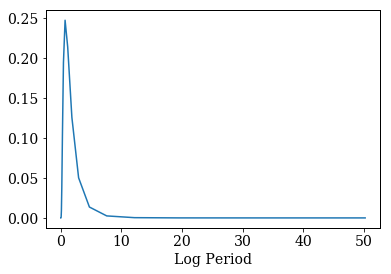

In [57]:
def gaussian(average,std,xvalue):
    y = np.exp(-(((xvalue-average)/std)**2))
    return y

Name = ['GRO J0422+32','A0620-00','GRS 1009-45','XTE J1118+480','GRS 1124-684','4U 1543-475','XTE J1550-564','GRO J1655-40','GX 339-4','H 1705-250','SAX J1819.3-2525','XTE J1859+226','GS 2000+251','XTE J1650-500','GS 1354-64','GS 2023+338']
distance = [0,1.57,0,2.86,2.04,7.02,0,3.51,0,0,5.77,0,0,0,0.67,2.37]
Porb = [5.1,7.8,6.8,4.1,10.4,26.8,37.0,62.9,42.1,12.5,67.6,9.2,8.3,7.6,61.1,155.3]
mv = [22.4,18.2,21.7,19.,20.5,16.6,22.0,17.3,19.2,21.5,13.7,23.29,21.7,24.0,21.5,18.5]
Av = [0.74,1.21,0.62,0.06,0.9,1.5,4.75,4.03,3.4,1.2,0.9,1.8,4.,4.65,3.1,3.3]
Porb = [x/24 for x in Porb]
Mv = [a-b for a,b in zip(mv,Av)]

gauss = []
periods = [np.log10(x) for x in Porb]
mean,std=norm.fit(periods)
prange = np.linspace(0,50,1000)
prange = [np.log10(x) for x in prange]
print(mean,std)
for T in range(len(prange)):    
    gauss.append(gaussian(mean,std,prange[T]))
normalised = [x/sum(gauss) for x in gauss]

prange = [10**(x) for x in prange]
plt.plot(prange,normalised)
plt.xlabel('Log Period')
plt.show()

periodRange = fullPeriod[0]
logPeriod = [np.log10(x) for x in periodRange]
periodProb = []
for x in range(len(logPeriod)):
    periodProb.append(gaussian(mean,std,logPeriod[x]))
normalisedPeriodProb = [x/sum(periodProb) for x in periodProb]
prange = [10**(x) for x in logPeriod]
plt.plot(prange,normalisedPeriodProb)
plt.xlabel('Log Period')
plt.show()

In [58]:
# spatialsum = 0.
# spatialprob =[]
# for x in range(len(resultList)):
#     spatialsum += resultList[x][5]
#     spatialprob.append(resultList[x][5])
stopper = 0
# probabilities = [x/sum(probabilities) for x in probabilities]
# normalised = probabilities
strategies = ['astro','minion','panstars','baseline']


for strat in range(len(fullSigPeriodMag)):
    #sigsum = 0
    finalProb = []
    total = 0
    found = 0
    magbinnotfound = 0
    redbinnotfound = 0
    for x in range(len(resultList)):
        total += 1
        if resultList[x][2] != -1:
            if resultList[x][4] != -1:
                for y in range(20):
                    sig = fullSigPeriodMag[strat][resultList[x][2]][resultList[x][4]][y]
                    if stopper ==0:
                        print(sig)
                        stopper +=1
                    #sigsum += sig
                    PorbProb = normalisedPeriodProb[y]
                    spatialProb = normalisedprob[x]
                    finalProb.append(sig*PorbProb*spatialProb)
                    found += 1
            elif resultList[4] == -1:
                redbinnotfound += 1
        else:
            magbinnotfound += 1

    normalisedfinal = [x/len(resultList) for x in finalProb]
    totalFraction = sum(finalProb)
    #print(sigsum)
    print(strategies[strat],totalFraction)

    print('total',total*20)
    print('found',found)
    print('notfound',((total*20)-found))
    print('magnotfound', magbinnotfound)
    print('rednotfound',redbinnotfound)
    print()

0.1558185885885886
astro 0.32283458731630693
total 231680
found 181680
notfound 50000
magnotfound 2500
rednotfound 0

minion 0.22347800744080917
total 231680
found 181680
notfound 50000
magnotfound 2500
rednotfound 0

panstars 0.3228345608507277
total 231680
found 181680
notfound 50000
magnotfound 2500
rednotfound 0

baseline 0.15224830357758357
total 231680
found 181680
notfound 50000
magnotfound 2500
rednotfound 0



In [59]:
def normalise(probabilities):
    sumprob = sum(probabilities)
    normalisedprob = [x/(sumprob) for x in probs]
    return normalisedprob

sumprob = 0
probs = []
for x in range(len(resultList)):
    sumprob += resultList[x][5]
    probs.append(resultList[x][5])
print(sumprob)
normalisedprob = [x/(sumprob) for x in probs]
print(sum(normalisedprob))
print(normalisedprob)

TypeError: unsupported operand type(s) for +=: 'int' and 'list'

In [113]:

newsigLevels = []
for x in range(len(sigLevels)/5):
    reformat = sigLevels[(x*5):(x*5)+5]
    newsigLevels.append(reformat)
sigLevels =newsigLevels

In [114]:
#average[0][0] = astroSig[0][0][0] + astroSig [0][0][1]
#newav = [[0.]*20]*20
newav = [[]]*20
counter = 0

averageSigLevels = []

for strat in range(len(sigLevels)):
    newav = [[]]*4
    for z in range(1,len(sigLevels[strat])):
        siglist = []
        for x in range(20):
            sigval = 0.
            for y in range(20):
                sigval += sigLevels[strat][z][y][x]
                #print(sigval,y)
            sigval = sigval/(y+1)
            siglist.append(sigval)
        newav[z-1] = siglist
    averageSigLevels.append(newav)

#print(averageSigLevels)

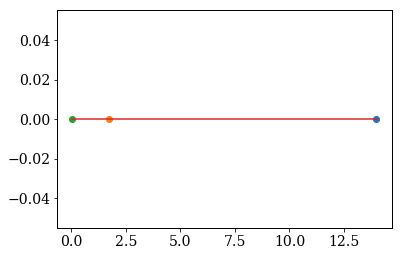

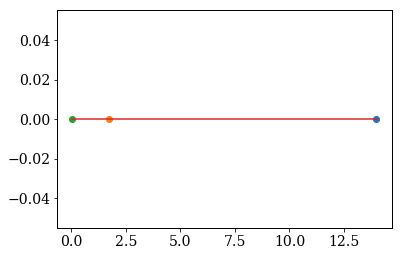

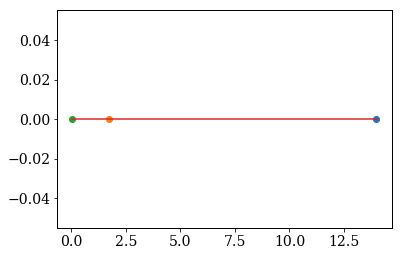

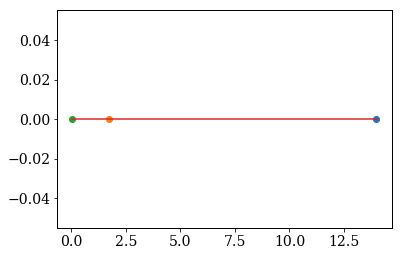

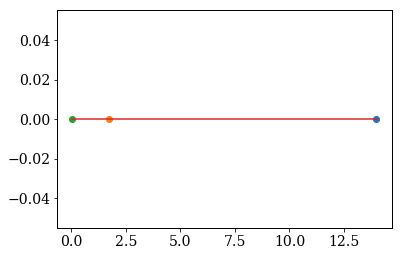

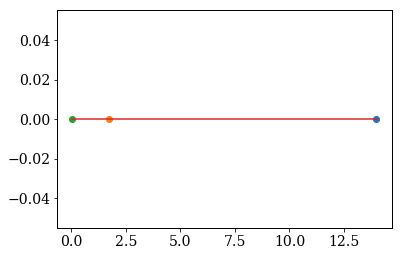

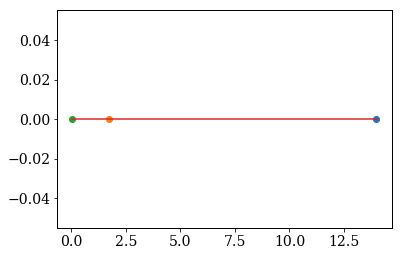

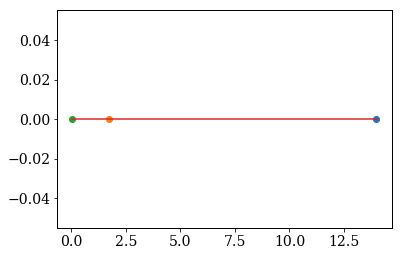

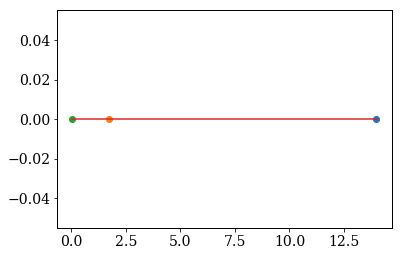

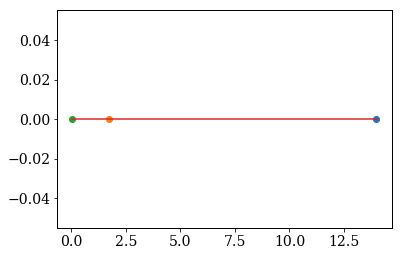

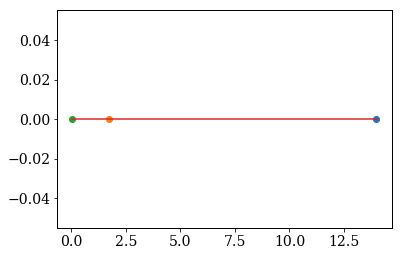

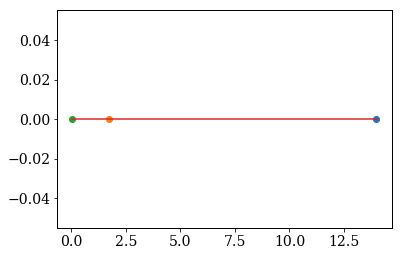

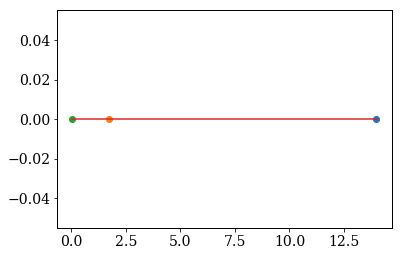

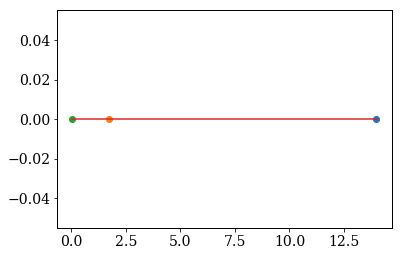

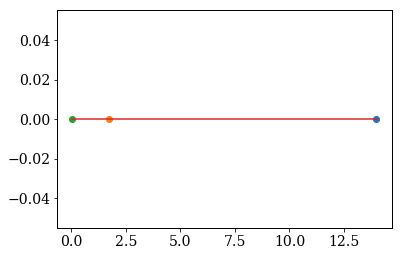

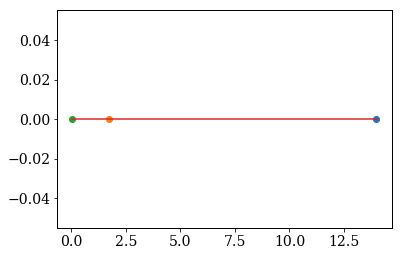

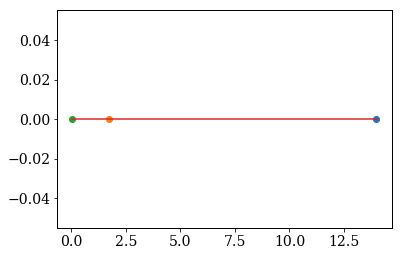

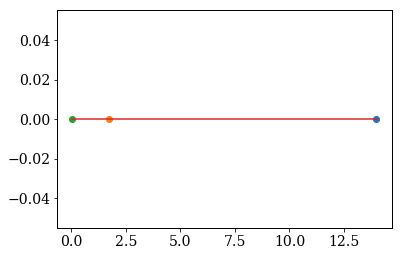

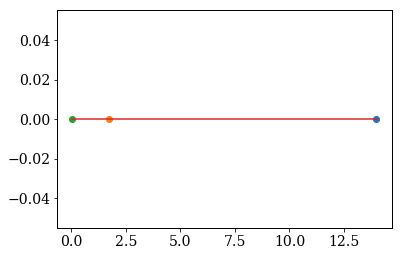

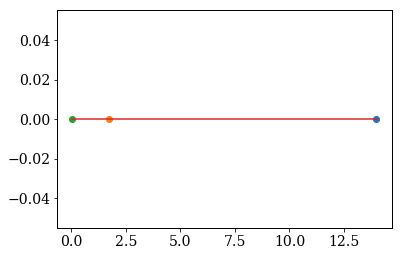

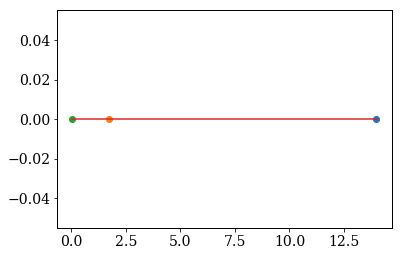

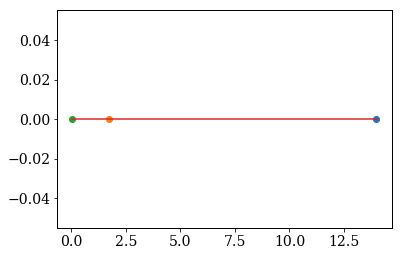

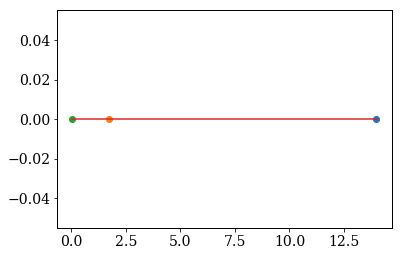

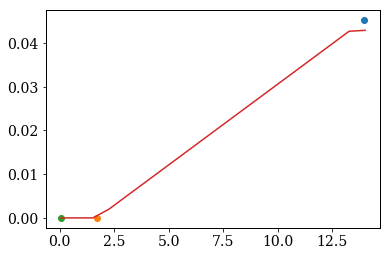

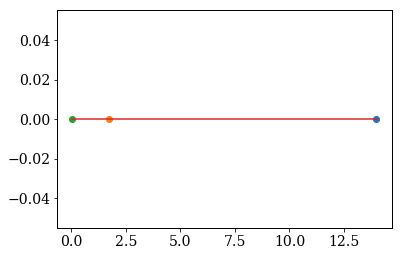

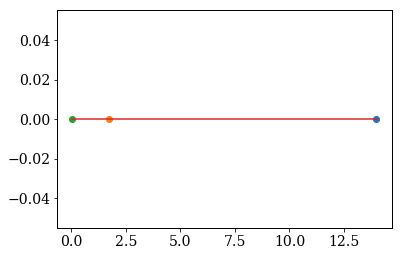

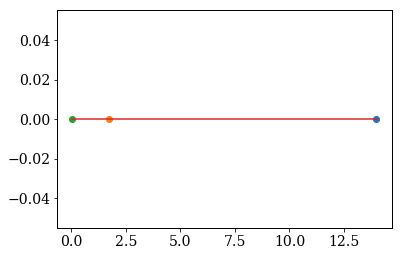

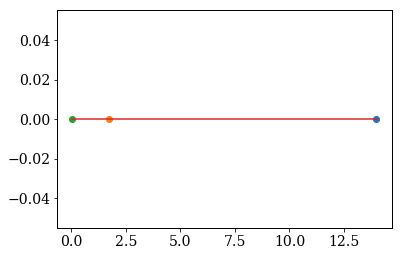

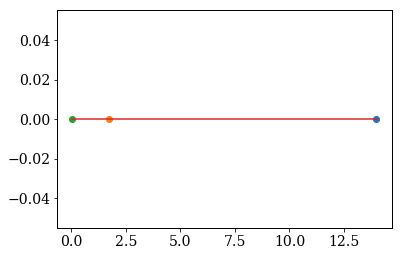

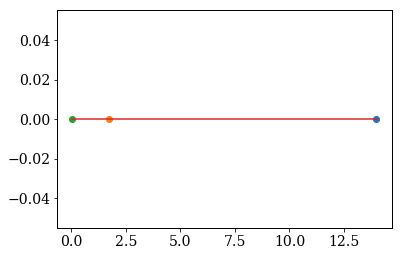

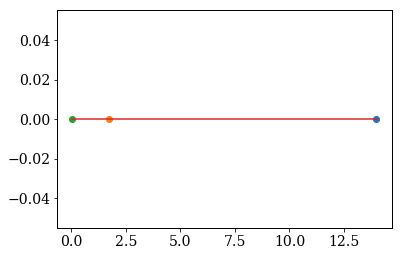

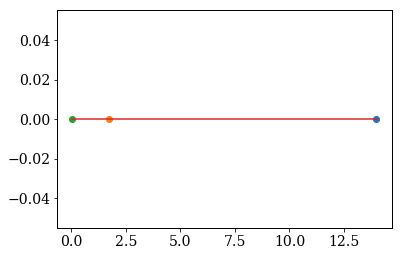

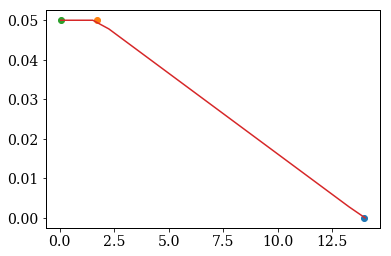

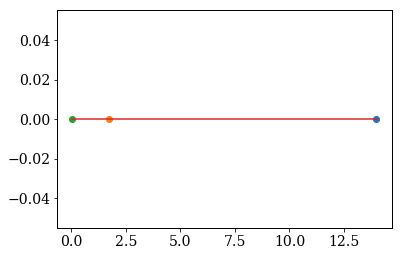

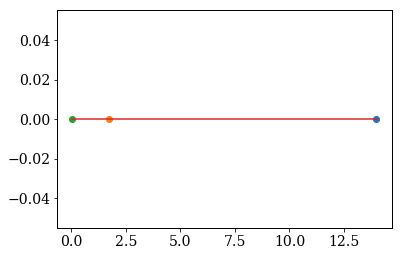

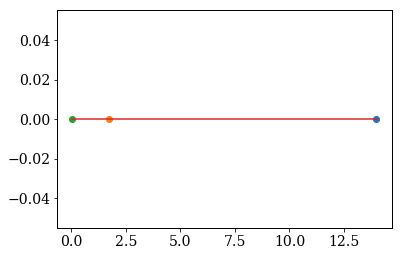

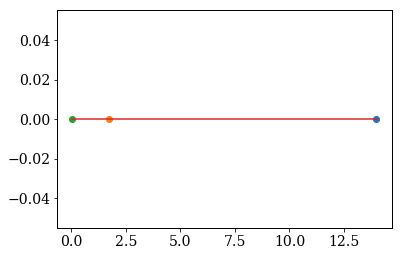

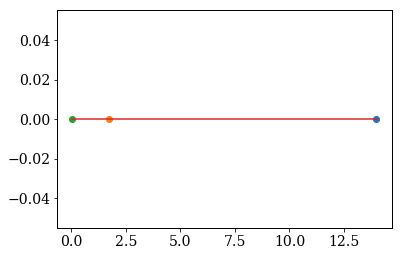

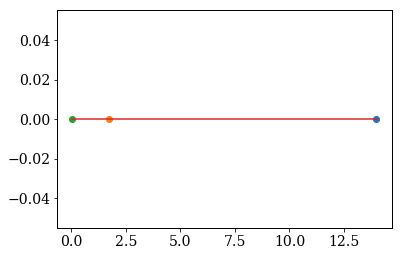

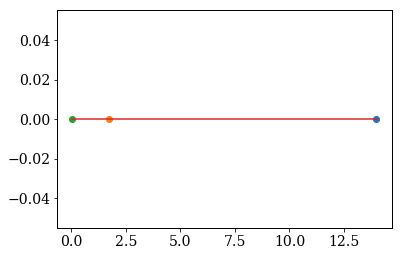

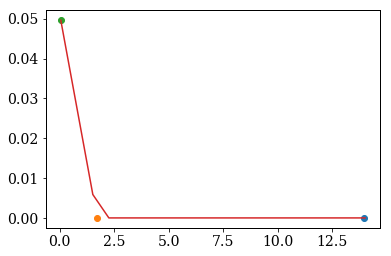

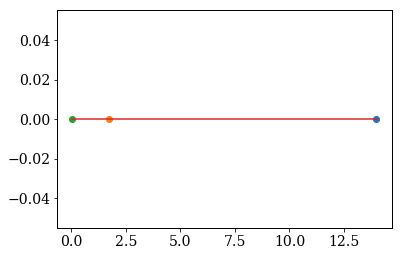

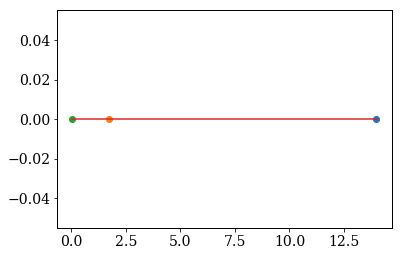

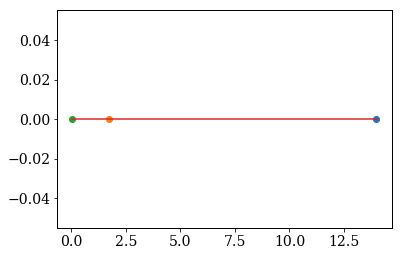

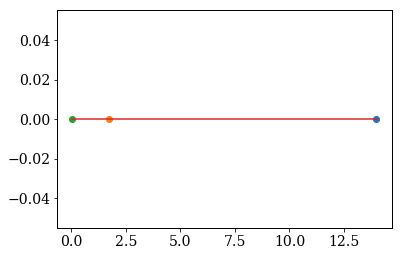

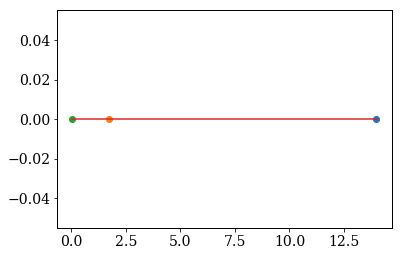

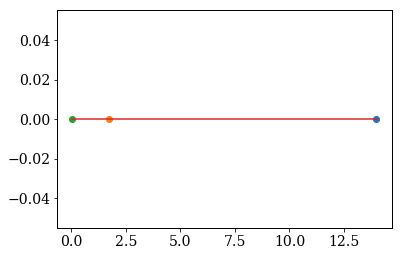

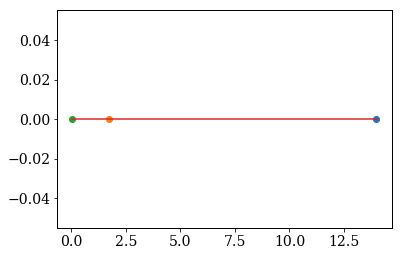

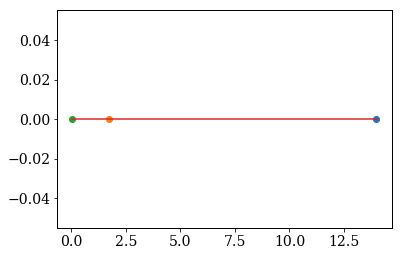

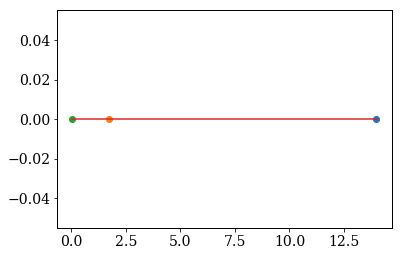

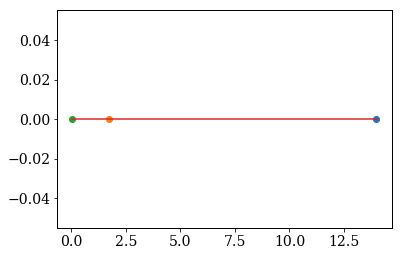

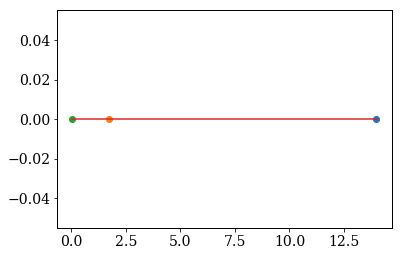

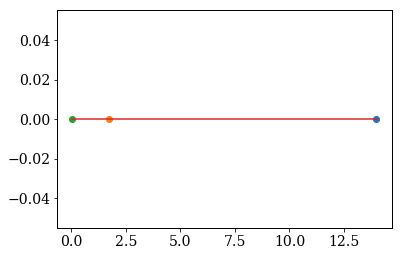

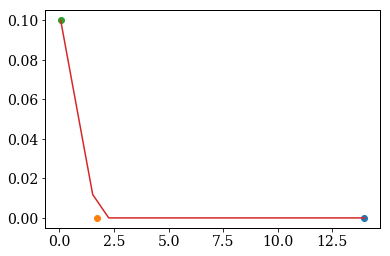

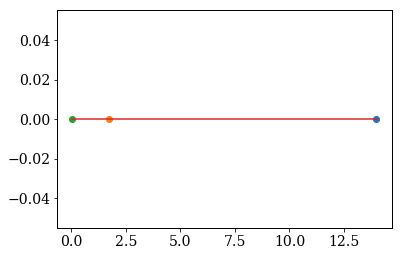

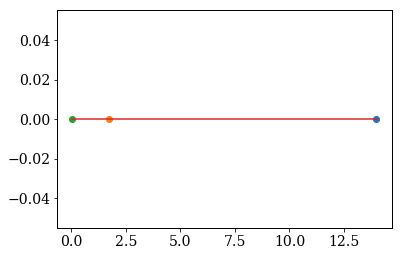

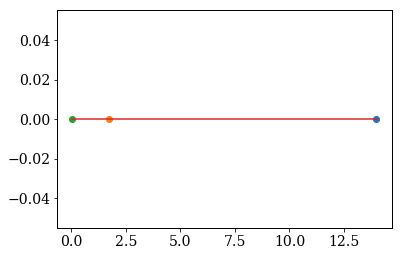

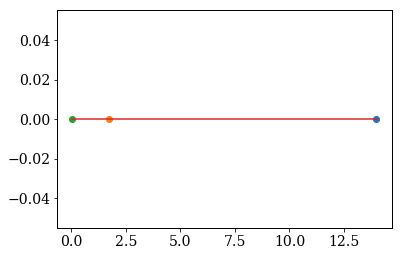

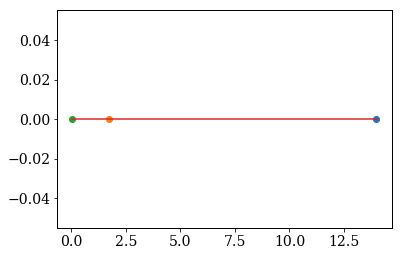

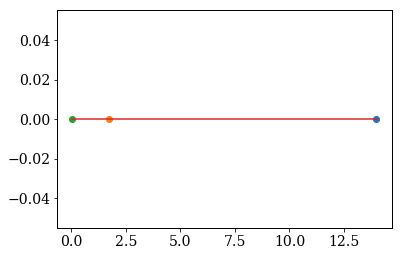

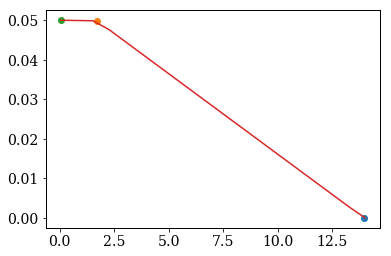

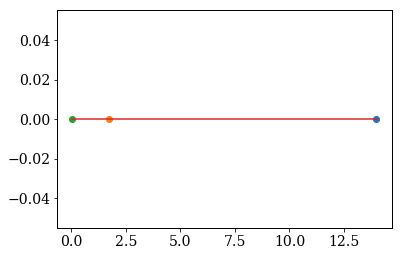

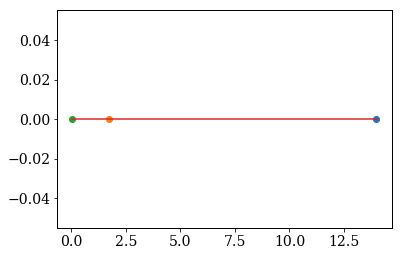

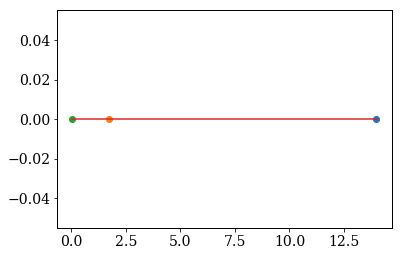

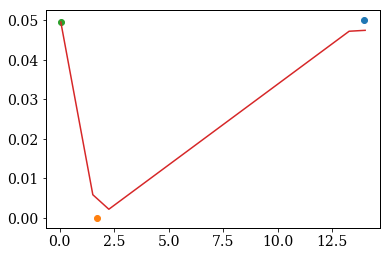

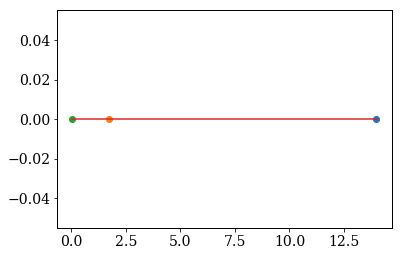

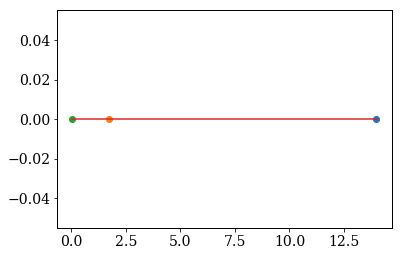

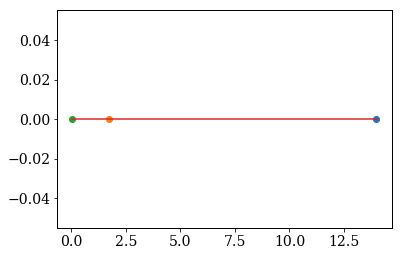

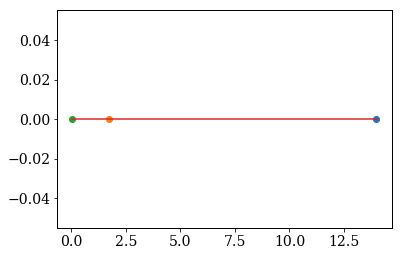

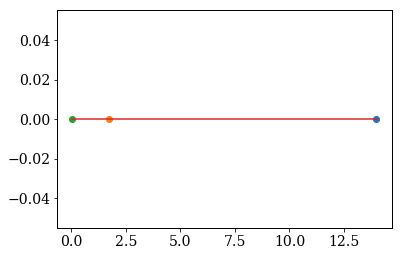

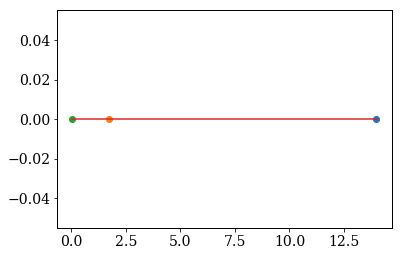

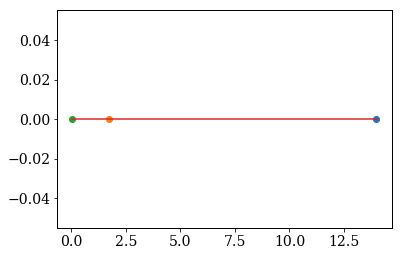

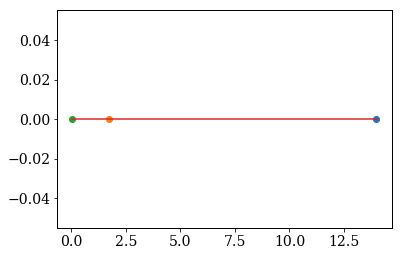

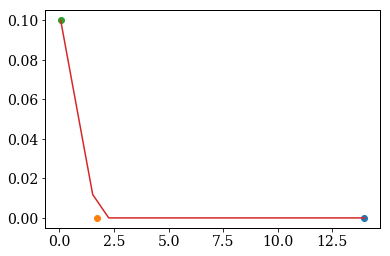

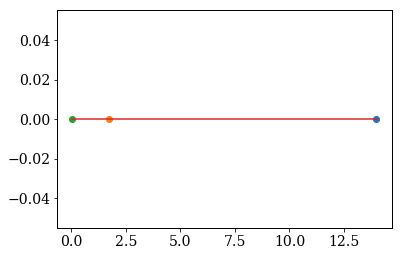

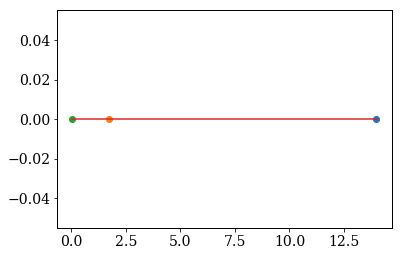

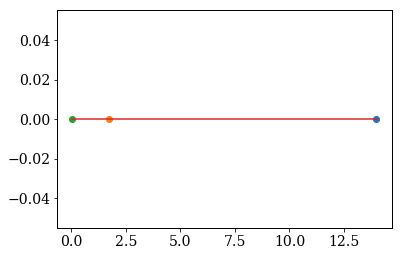

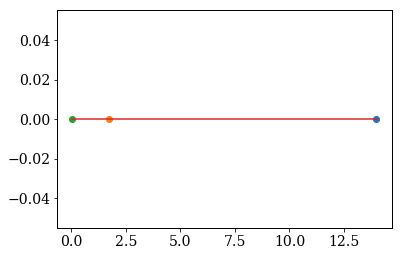

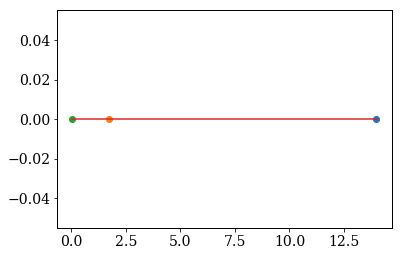

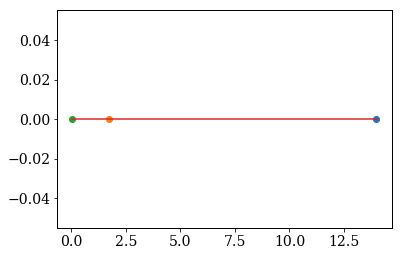

In [115]:
# Ar 1.719 13.94 1.398 0.054 0.437 5.73
number = ['3311','1322','1304','630','1929'] # '169']

Ar = [13.9462188,1.719,0.054]#,1.398] #,5.73]
reddening = np.linspace(0.054,13.94,20)

# fullSigLevelsRedPeriod = []
# fullSigRedMag = []
# reddening = np.linspace(0.054,14,20)

fullSigLevelsRedPeriod = []
fullSigRedPeriod = []

#fullSigPeriodMag = []
for strat in range(len(averageSigLevels)):
    astrosigLevel = averageSigLevels[strat]
    reformat = [[]]*len(reddening)
    finalsig = []
    for i,item in enumerate(reddening):
        redsig = []
        if item >= Ar[2] and item < Ar[1]:
            Y = [a-b for a,b in zip(astrosigLevel[1],astrosigLevel[2])]
            X = Ar[1]-Ar[2]
            m = [slope/X for slope in Y]
            sig = [y+(slope*(item-Ar[2])) for y,slope in zip(astrosigLevel[2],m)]
#         elif item >= Ar[3] and item < Ar[1]:
#             Y = [a-b for a,b in zip(astrosigLevel[1],astrosigLevel[3])]
#             X = Ar[3]-Ar[1]
#             m = [slope/X for slope in Y]
#             sig = [y+(slope*(item-Ar[3])) for y,slope in zip(astrosigLevel[3],m)]
        elif item >= Ar[1] and item < Ar[0]:
            Y = [a-b for a,b in zip(astrosigLevel[0],astrosigLevel[1])]
            X = Ar[0]-Ar[1]
            m = [slope/X for slope in Y]
            sig = [y+(slope*(item-Ar[1])) for y,slope in zip(astrosigLevel[1],m)]
        elif item >= Ar[0]:
            Y = [-x for x in astrosigLevel[0]]
            X = 15-Ar[0]
            m = [slope/X for slope in Y]
            sig = [y+(slope*(item-Ar[0])) for y,slope in zip(astrosigLevel[0],m)]
        for cycle in range(len(sig)):
            if sig[cycle] < 0.:
                sig[cycle] = 0.

        finalsig.append(sig)
    fullSigLevelsRedPeriod.append(finalsig)
    reformat = []
    #print(len(finalsig))
    for x in range(len(finalsig)):
        newsig = []
        #print(len(finalsig))
        for y in range(len(finalsig[x])):
            #print(len(finalsig[y]))
            #print(x,y)
            
            newsig.append(finalsig[y][x])
        reformat.append(newsig)
    fullSigRedPeriod.append(reformat)
    for x in range((20)):
        for y in range(len(Ar)):
            plt.plot(Ar[y],astrosigLevel[y][x],'o')
        plt.plot(reddening,reformat[x])
        plt.show()
        
        
#             redsig.append(sig)
#         magsig.append(redsig)
#     fullSigPeriodMag.append(magsig)

In [98]:
fullRed = []
for i,item in enumerate(reddening):
    fullRed.append([item]*20)
#print(fullRed)

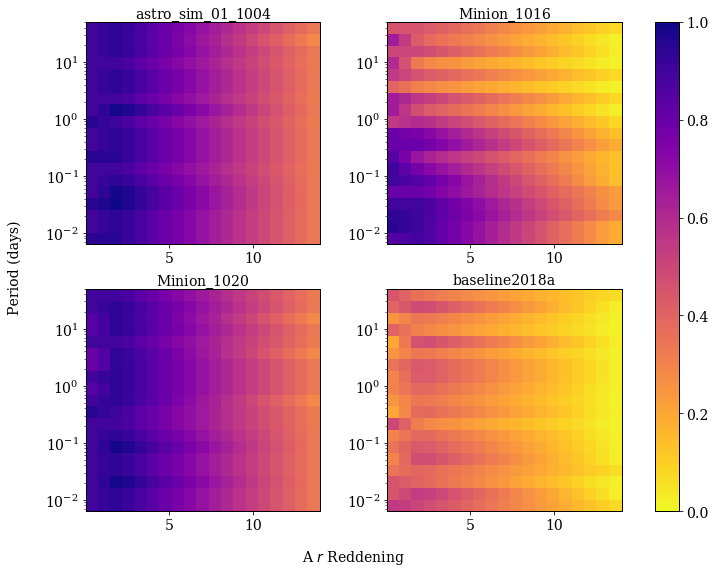

In [101]:
#astro minion minionOC panstars baseline

fig = plt.figure(figsize=(12,9))
#ax = plt.gca()

import matplotlib.gridspec as gridspec

gs=gridspec.GridSpec(2,2000)

plt.rc('axes',linewidth=0)
ydis = 1.07
fakeaxis=fig.add_subplot(gs[:,:])
fakeaxis.set_yticks([])
fakeaxis.set_xticks([])

ax_list = fig.axes

plt.rc('font', **font)
plt.rc('axes',linewidth=1)

p1=fig.add_subplot(gs[0,0:700])
im = p1.pcolor(fullRed,fullPeriod,fullSigLevelsRedPeriod[0],cmap='plasma_r',vmin=0,vmax=1)
p1.set_yscale('log')
p1.set_ylabel('astro$\_$sim$\_$01$\_$1004',rotation=0,va="top")
p1.yaxis.set_label_coords(0.5,ydis)

font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}

#plt.xlabel('Magnitude')#,fontweight='semibold')
# plt.ylabel('Period (days)')#,fontweight='semibold')
#plt.title('X-ray Binary Period Recovery in all Filters',y=1.05,x=1.0)#,fontweight='semibold')

p2=fig.add_subplot(gs[0,900:1600])
im = p2.pcolor(fullRed,fullPeriod,fullSigLevelsRedPeriod[1],cmap='plasma_r',vmin=0,vmax=1)
p2.set_yscale('log')
p2.set_ylabel('Minion$\_$1016',rotation=0,va="top")
p2.yaxis.set_label_coords(0.5,ydis)

p3=fig.add_subplot(gs[1,0:700])
im = p3.pcolor(fullRed,fullPeriod,fullSigLevelsRedPeriod[2],cmap='plasma_r',vmin=0,vmax=1)
p3.set_yscale('log')
p3.set_ylabel('Minion$\_$1020',rotation=0,va="top")
p3.yaxis.set_label_coords(0.5,ydis)

p4=fig.add_subplot(gs[1,900:1600])
im = p4.pcolor(fullRed,fullPeriod,fullSigLevelsRedPeriod[3],cmap='plasma_r',vmin=0,vmax=1)
p4.set_yscale('log')
p4.set_ylabel('baseline2018a',rotation=0,va="top")
p4.yaxis.set_label_coords(0.5,ydis)

#print ax_list

#fig.colorbar(im, ax=ax.ravel().tolist())
plt.sca(fakeaxis)
plt.colorbar(im)
fakeaxis.set_ylabel('Period (days)')
fakeaxis.set_xlabel('A $\it{r}$ Reddening',labelpad=20)
fakeaxis.yaxis.set_label_coords(-0.12, 0.5)
#fakeaxis.set_label_coords(0.5,-0.1)
#label = fakeaxis.set_xlabel('Xlabel', fontsize = 9)
fakeaxis.xaxis.set_label_coords(0.5, -0.075)

plt.savefig('allGsRedPeriod.png',dpi=300,bbox_inches='tight')
plt.show()

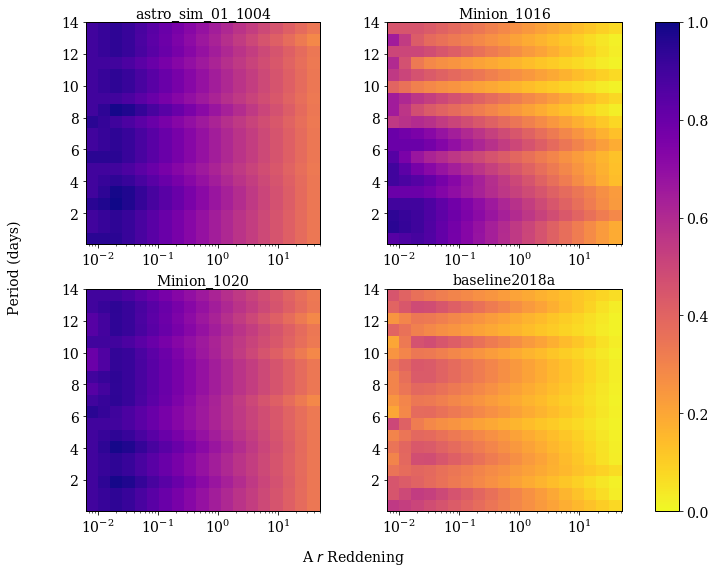

In [100]:
#astro minion minionOC panstars baseline

fig = plt.figure(figsize=(12,9))
#ax = plt.gca()

import matplotlib.gridspec as gridspec

gs=gridspec.GridSpec(2,2000)

plt.rc('axes',linewidth=0)
ydis = 1.07
fakeaxis=fig.add_subplot(gs[:,:])
fakeaxis.set_yticks([])
fakeaxis.set_xticks([])

ax_list = fig.axes

plt.rc('font', **font)
plt.rc('axes',linewidth=1)

p1=fig.add_subplot(gs[0,0:700])
im = p1.pcolor(fullPeriod,fullRed,fullSigRedPeriod[0],cmap='plasma_r',vmin=0,vmax=1)
p1.set_xscale('log')
p1.set_ylabel('astro$\_$sim$\_$01$\_$1004',rotation=0,va="top")
p1.yaxis.set_label_coords(0.5,ydis)

font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}

#plt.xlabel('Magnitude')#,fontweight='semibold')
# plt.ylabel('Period (days)')#,fontweight='semibold')
#plt.title('X-ray Binary Period Recovery in all Filters',y=1.05,x=1.0)#,fontweight='semibold')

p2=fig.add_subplot(gs[0,900:1600])
im = p2.pcolor(fullPeriod,fullRed,fullSigRedPeriod[1],cmap='plasma_r',vmin=0,vmax=1)
p2.set_xscale('log')
p2.set_ylabel('Minion$\_$1016',rotation=0,va="top")
p2.yaxis.set_label_coords(0.5,ydis)

p3=fig.add_subplot(gs[1,0:700])
im = p3.pcolor(fullPeriod,fullRed,fullSigRedPeriod[2],cmap='plasma_r',vmin=0,vmax=1)
p3.set_xscale('log')
p3.set_ylabel('Minion$\_$1020',rotation=0,va="top")
p3.yaxis.set_label_coords(0.5,ydis)

p4=fig.add_subplot(gs[1,900:1600])
im = p4.pcolor(fullPeriod,fullRed,fullSigRedPeriod[3],cmap='plasma_r',vmin=0,vmax=1)
p4.set_xscale('log')
p4.set_ylabel('baseline2018a',rotation=0,va="top")
p4.yaxis.set_label_coords(0.5,ydis)

#print ax_list

#fig.colorbar(im, ax=ax.ravel().tolist())
plt.sca(fakeaxis)
plt.colorbar(im)
fakeaxis.set_ylabel('Period (days)')
fakeaxis.set_xlabel('A $\it{r}$ Reddening',labelpad=20)
fakeaxis.yaxis.set_label_coords(-0.12, 0.5)
#fakeaxis.set_label_coords(0.5,-0.1)
#label = fakeaxis.set_xlabel('Xlabel', fontsize = 9)
fakeaxis.xaxis.set_label_coords(0.5, -0.075)

plt.savefig('allGsRedPeriod.png',dpi=300,bbox_inches='tight')
plt.show()

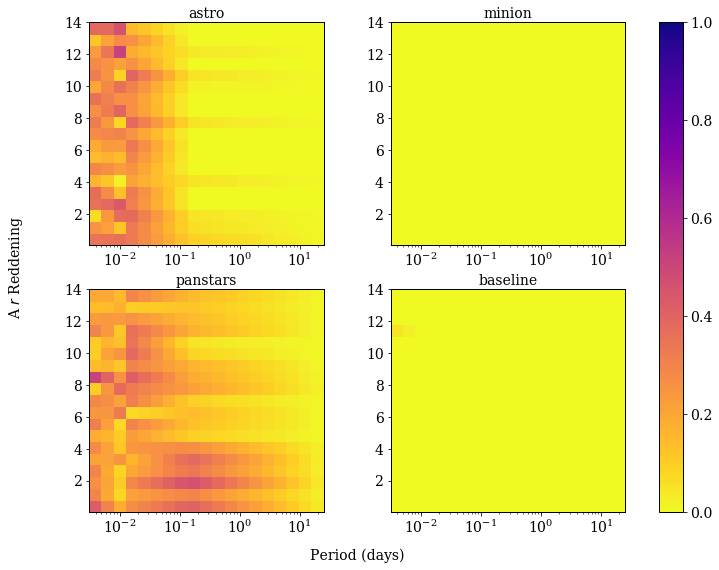

In [81]:
#astro minion minionOC panstars baseline

fig = plt.figure(figsize=(12,9))
#ax = plt.gca()

import matplotlib.gridspec as gridspec

gs=gridspec.GridSpec(2,2000)

plt.rc('axes',linewidth=0)
ydis = 1.07
fakeaxis=fig.add_subplot(gs[:,:])
fakeaxis.set_yticks([])
fakeaxis.set_xticks([])

ax_list = fig.axes

plt.rc('font', **font)
plt.rc('axes',linewidth=1)

p1=fig.add_subplot(gs[0,0:700])
im = p1.pcolor(fullPeriod,fullRed,fullSigRedPeriod[0],cmap='plasma_r',vmin=0,vmax=1)
p1.set_xscale('log')
p1.set_ylabel('astro',rotation=0,va="top")
p1.yaxis.set_label_coords(0.5,ydis)

font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}

#plt.xlabel('Magnitude')#,fontweight='semibold')
# plt.ylabel('Period (days)')#,fontweight='semibold')
#plt.title('X-ray Binary Period Recovery in all Filters',y=1.05,x=1.0)#,fontweight='semibold')

p2=fig.add_subplot(gs[0,900:1600])
im = p2.pcolor(fullPeriod,fullRed,fullSigRedPeriod[1],cmap='plasma_r',vmin=0,vmax=1)
p2.set_xscale('log')
p2.set_ylabel('minion',rotation=0,va="top")
p2.yaxis.set_label_coords(0.5,ydis)

p3=fig.add_subplot(gs[1,0:700])
im = p3.pcolor(fullPeriod,fullRed,fullSigRedPeriod[2],cmap='plasma_r',vmin=0,vmax=1)
p3.set_xscale('log')
p3.set_ylabel('panstars',rotation=0,va="top")
p3.yaxis.set_label_coords(0.5,ydis)

p4=fig.add_subplot(gs[1,900:1600])
im = p4.pcolor(fullPeriod,fullRed,fullSigRedPeriod[3],cmap='plasma_r',vmin=0,vmax=1)
p4.set_xscale('log')
p4.set_ylabel('baseline',rotation=0,va="top")
p4.yaxis.set_label_coords(0.5,ydis)

#print ax_list

#fig.colorbar(im, ax=ax.ravel().tolist())
plt.sca(fakeaxis)
plt.colorbar(im)
fakeaxis.set_ylabel('A $\it{r}$ Reddening')
fakeaxis.set_xlabel('Period (days)',labelpad=20)
fakeaxis.yaxis.set_label_coords(-0.12, 0.5)
#fakeaxis.set_label_coords(0.5,-0.1)
#label = fakeaxis.set_xlabel('Xlabel', fontsize = 9)
fakeaxis.xaxis.set_label_coords(0.5, -0.075)

plt.savefig('allGs.png',dpi=300,bbox_inches='tight')
plt.show()

In [90]:
#astro minion minionOC panstars baseline

fig = plt.figure(figsize=(12,9))
#ax = plt.gca()

import matplotlib.gridspec as gridspec

gs=gridspec.GridSpec(2,2000)

plt.rc('axes',linewidth=0)
ydis = 1.07
fakeaxis=fig.add_subplot(gs[:,:])
fakeaxis.set_yticks([])
fakeaxis.set_xticks([])

ax_list = fig.axes

plt.rc('font', **font)
plt.rc('axes',linewidth=1)

p1=fig.add_subplot(gs[0,0:700])
im = p1.pcolor(fullMag,fullPeriod,averageSigLevels[0],cmap='plasma_r',vmin=0,vmax=1)
p1.set_yscale('log')
p1.set_ylabel('astro',rotation=0,va="top")
p1.yaxis.set_label_coords(0.5,ydis)

font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}

# plt.xlabel('Magnitude')#,fontweight='semibold')
# plt.ylabel('Period (days)')#,fontweight='semibold')
#plt.title('X-ray Binary Period Recovery in all Filters',y=1.05,x=1.0)#,fontweight='semibold')

p2=fig.add_subplot(gs[0,900:1600])
im = p2.pcolor(fullMag,fullPeriod,averageSigLevels[1],cmap='plasma_r',vmin=0,vmax=1)
p2.set_yscale('log')
p2.set_ylabel('minion',rotation=0,va="top")
p2.yaxis.set_label_coords(0.5,ydis)

p3=fig.add_subplot(gs[1,0:700])
im = p3.pcolor(fullMag,fullPeriod,averageSigLevels[3],cmap='plasma_r',vmin=0,vmax=1)
p3.set_yscale('log')
p3.set_ylabel('panstars',rotation=0,va="top")
p3.yaxis.set_label_coords(0.5,ydis)

p4=fig.add_subplot(gs[1,900:1600])
im = p4.pcolor(fullMag,fullPeriod,averageSigLevels[4],cmap='plasma_r',vmin=0,vmax=1)
p4.set_yscale('log')
p4.set_ylabel('baseline',rotation=0,va="top")
p4.yaxis.set_label_coords(0.5,ydis)

print ax_list

#fig.colorbar(im, ax=ax.ravel().tolist())
plt.sca(fakeaxis)
plt.colorbar(im)
fakeaxis.set_xlabel('$\it{r}$ Magnitude')
fakeaxis.set_ylabel('Period (days)',labelpad=20)
fakeaxis.yaxis.set_label_coords(-0.12, 0.5)
#fakeaxis.set_label_coords(0.5,-0.1)
#label = fakeaxis.set_xlabel('Xlabel', fontsize = 9)
fakeaxis.xaxis.set_label_coords(0.5, -0.075)

plt.savefig('allGs.png',dpi=300,bbox_inches='tight')
plt.show()

TypeError: Dimensions of C (4, 20) are incompatible with X (20) and/or Y (20); see help(pcolor)

In [200]:

sigLevels = [valuefile.fullSigastro3311,valuefile.fullSigastro1322,valuefile.fullSigastro1304,valuefile.fullSigastro630,valuefile.fullSigastro1929,valuefile.fullSigminion3311,valuefile.fullSigminion1322,valuefile.fullSigminion1304,valuefile.fullSigminion630,valuefile.fullSigminion1929,valuefile.fullSigpanstars3311,valuefile.fullSigpanstars1322,valuefile.fullSigpanstars1304,valuefile.fullSigpanstars630,valuefile.fullSigpanstars1929,valuefile.fullSigbaseline3311,valuefile.fullSigbaseline1322,valuefile.fullSigbaseline1304,valuefile.fullSigbaseline630,valuefile.fullSigbaseline1929]
sigLevels = multiList(sigLevels)

bigSig = 0
count = 0
seventeenth = 0
twentyfour = 0
lowPeriod = 0
highPeriod = 0

for z in range(len(measuredPeriods)):
    goodcount = 0
    count = 0
    for x in range(len(fullMag)):
        for y in range(len(fullPeriod)):
            #print(x,y)
            if measuredPeriods[z][x][y] < (fullPeriod[x][y]+(fullPeriod[x][y]*0.05)) and measuredPeriods[z][x][y] > (fullPeriod[x][y]-(fullPeriod[x][y]*0.05)):
                goodcount += 1.

            else: 
                sigLevels[z][x][z] = 0
                count += 1.

newsigLevels = []
for x in range(len(sigLevels)/5):
    reformat = sigLevels[(x*5):(x*5)+5]
    newsigLevels.append(reformat)
sigLevels =newsigLevels

In [201]:
print(len(sigLevels[0]))

5


In [202]:
tempnum = 0
avsig = []
averagesig = []
for tempnum in range(len(sigLevels)):
    avsig = []
    for x in range(len(sigLevels[tempnum][0])):
        averageSig = [(a+b+c+d+e)/5 for a,b,c,d,e in zip(sigLevels[tempnum][0][x],sigLevels[tempnum][1][x],sigLevels[tempnum][2][x],sigLevels[tempnum][3][x],sigLevels[tempnum][4][x])]
        avsig.append(averageSig)
    averagesig.append(avsig)

In [203]:
averageSigLevels = averagesig

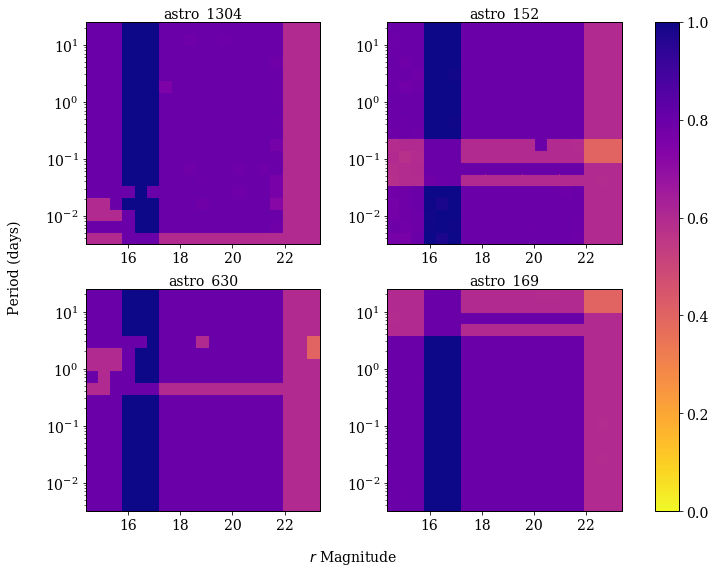

In [204]:
fig = plt.figure(figsize=(12,9))
#ax = plt.gca()

import matplotlib.gridspec as gridspec

gs=gridspec.GridSpec(2,2000)

plt.rc('axes',linewidth=0)
ydis = 1.07
fakeaxis=fig.add_subplot(gs[:,:])
fakeaxis.set_yticks([])
fakeaxis.set_xticks([])

font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}

ax_list = fig.axes

plt.rc('font', **font)
plt.rc('axes',linewidth=1)

p1=fig.add_subplot(gs[0,0:700])
im = p1.pcolor(fullMag,fullPeriod,averageSigLevels[0],cmap='plasma_r',vmin=0,vmax=1)
p1.set_yscale('log')
p1.set_ylabel('astro_1304',rotation=0,va="top")
p1.yaxis.set_label_coords(0.5,ydis)



# plt.xlabel('Magnitude')#,fontweight='semibold')
# plt.ylabel('Period (days)')#,fontweight='semibold')
#plt.title('X-ray Binary Period Recovery in all Filters',y=1.05,x=1.0)#,fontweight='semibold')

p2=fig.add_subplot(gs[0,900:1600])
im = p2.pcolor(fullMag,fullPeriod,averageSigLevels[1],cmap='plasma_r',vmin=0,vmax=1)
p2.set_yscale('log')
p2.set_ylabel('astro_152',rotation=0,va="top")
p2.yaxis.set_label_coords(0.5,ydis)

p3=fig.add_subplot(gs[1,0:700])
im = p3.pcolor(fullMag,fullPeriod,averageSigLevels[2],cmap='plasma_r',vmin=0,vmax=1)
p3.set_yscale('log')
p3.set_ylabel('astro_630',rotation=0,va="top")
p3.yaxis.set_label_coords(0.5,ydis)

p4=fig.add_subplot(gs[1,900:1600])
im = p4.pcolor(fullMag,fullPeriod,averageSigLevels[3],cmap='plasma_r',vmin=0,vmax=1)
p4.set_yscale('log')
p4.set_ylabel('astro_169',rotation=0,va="top")
p4.yaxis.set_label_coords(0.5,ydis)

#print ax_list

#fig.colorbar(im, ax=ax.ravel().tolist())
plt.sca(fakeaxis)
plt.colorbar(im)
fakeaxis.set_xlabel('$\it{r}$ Magnitude')
fakeaxis.set_ylabel('Period (days)',labelpad=20)
fakeaxis.yaxis.set_label_coords(-0.12, 0.5)
#fakeaxis.set_label_coords(0.5,-0.1)
#label = fakeaxis.set_xlabel('Xlabel', fontsize = 9)
fakeaxis.xaxis.set_label_coords(0.5, -0.075)

plt.savefig('allGs.png',dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
#astro minion minionOC panstars baseline

fig = plt.figure(figsize=(12,9))
#ax = plt.gca()

import matplotlib.gridspec as gridspec

gs=gridspec.GridSpec(2,2000)

plt.rc('axes',linewidth=0)
ydis = 1.07
fakeaxis=fig.add_subplot(gs[:,:])
fakeaxis.set_yticks([])
fakeaxis.set_xticks([])

ax_list = fig.axes

plt.rc('font', **font)
plt.rc('axes',linewidth=1)

p1=fig.add_subplot(gs[0,0:700])
im = p1.pcolor(fullMag,fullPeriod,averageSigLevels[0],cmap='plasma_r',vmin=0,vmax=1)
p1.set_yscale('log')
p1.set_ylabel('astro',rotation=0,va="top")
p1.yaxis.set_label_coords(0.5,ydis)

font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}

# plt.xlabel('Magnitude')#,fontweight='semibold')
# plt.ylabel('Period (days)')#,fontweight='semibold')
#plt.title('X-ray Binary Period Recovery in all Filters',y=1.05,x=1.0)#,fontweight='semibold')

p2=fig.add_subplot(gs[0,900:1600])
im = p2.pcolor(fullMag,fullPeriod,averageSigLevels[1],cmap='plasma_r',vmin=0,vmax=1)
p2.set_yscale('log')
p2.set_ylabel('minion',rotation=0,va="top")
p2.yaxis.set_label_coords(0.5,ydis)

p3=fig.add_subplot(gs[1,0:700])
im = p3.pcolor(fullMag,fullPeriod,averageSigLevels[3],cmap='plasma_r',vmin=0,vmax=1)
p3.set_yscale('log')
p3.set_ylabel('panstars',rotation=0,va="top")
p3.yaxis.set_label_coords(0.5,ydis)

p4=fig.add_subplot(gs[1,900:1600])
im = p4.pcolor(fullMag,fullPeriod,averageSigLevels[4],cmap='plasma_r',vmin=0,vmax=1)
p4.set_yscale('log')
p4.set_ylabel('baseline',rotation=0,va="top")
p4.yaxis.set_label_coords(0.5,ydis)

print ax_list

#fig.colorbar(im, ax=ax.ravel().tolist())
plt.sca(fakeaxis)
plt.colorbar(im)
fakeaxis.set_xlabel('$\it{r}$ Magnitude')
fakeaxis.set_ylabel('Period (days)',labelpad=20)
fakeaxis.yaxis.set_label_coords(-0.12, 0.5)
#fakeaxis.set_label_coords(0.5,-0.1)
#label = fakeaxis.set_xlabel('Xlabel', fontsize = 9)
fakeaxis.xaxis.set_label_coords(0.5, -0.075)

plt.savefig('allGs.png',dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
magSigs = [fullSigLevelAstro,fullSigLevelMinion,fullSigLevelMinionObsChange,fullSigLevelPanstars]

#fakeaxis=fig.add_subplot(gs[:,20])


In [ ]:
fig = plt.figure(figsize=(12,9))
#ax = plt.gca()

import matplotlib.gridspec as gridspec

gs=gridspec.GridSpec(2,2000)

plt.rc('axes',linewidth=0)
ydis = 1.07
fakeaxis=fig.add_subplot(gs[:,:])
fakeaxis.set_yticks([])
fakeaxis.set_xticks([])

ax_list = fig.axes

plt.rc('font', **font)
plt.rc('axes',linewidth=1)

p1=fig.add_subplot(gs[0,0:700])
im = p1.pcolor(fullMag,fullPeriod,fullSigLevelAstro,cmap='plasma_r',vmin=0,vmax=1)
p1.set_yscale('log')
p1.set_ylabel('astro_sim_01_1004',rotation=0,va="top")
p1.yaxis.set_label_coords(0.5,ydis)

font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}

# plt.xlabel('Magnitude')#,fontweight='semibold')
# plt.ylabel('Period (days)')#,fontweight='semibold')
#plt.title('X-ray Binary Period Recovery in all Filters',y=1.05,x=1.0)#,fontweight='semibold')

p2=fig.add_subplot(gs[0,900:1600])
im = p2.pcolor(fullMag,fullPeriod,fullSigLevelPanstars,cmap='plasma_r',vmin=0,vmax=1)
p2.set_yscale('log')
p2.set_ylabel('Minion_1020',rotation=0,va="top")
p2.yaxis.set_label_coords(0.5,ydis)

p3=fig.add_subplot(gs[1,0:700])
im = p3.pcolor(fullMag,fullPeriod,fullSigLevelMinionObsChange,cmap='plasma_r',vmin=0,vmax=1)
p3.set_yscale('log')
p3.set_ylabel('Minion_1016j',rotation=0,va="top")
p3.yaxis.set_label_coords(0.5,ydis)

p4=fig.add_subplot(gs[1,900:1600])
im = p4.pcolor(fullMag,fullPeriod,fullSigLevelMinion,cmap='plasma_r',vmin=0,vmax=1)
p4.set_yscale('log')
p4.set_ylabel('Minion_1016',rotation=0,va="top")
p4.yaxis.set_label_coords(0.5,ydis)

print ax_list

#fig.colorbar(im, ax=ax.ravel().tolist())
plt.sca(fakeaxis)
plt.colorbar(im)
fakeaxis.set_xlabel('$\it{r}$ Magnitude')
fakeaxis.set_ylabel('Period (days)',labelpad=20)
fakeaxis.yaxis.set_label_coords(-0.12, 0.5)
#fakeaxis.set_label_coords(0.5,-0.1)
#label = fakeaxis.set_xlabel('Xlabel', fontsize = 9)
fakeaxis.xaxis.set_label_coords(0.5, -0.075)

plt.savefig('allGs.png',dpi=300,bbox_inches='tight')
plt.show()

In [147]:
d = 0.48*1000
m = 4.6+5*(np.log10(d)-1)
print(m)

13.006206186877936


In [148]:
0.5**2

0.25

In [149]:
23**2

529